# Video Game Sales Analysis Project

## Introduction
The purpose of this project is to analyze a dataset containing a variety of information on historical video game releases. One of the key aspects to be analyzed will be the sales figures for those game releases, and how such sales figures relate to key game properties such as the platform it was released for, the region(s) it was released in, its genre, or its reception as perceived through user/critic scores. A variety of potential relationships between these data points will be explored. A main goal of this investigation will be to generate enough insights that will allow one to assess what may reasonably happen in 2017, the year right after the coverage of this dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from IPython.display import display

In [2]:
# Function for outputting DataFrame information
def custom_info(df, head_cnt=10):
    df.info(memory_usage=False)
    print("\n")
    display(df.head(head_cnt))

## Preparing the `main` DataFrame

In [3]:
# add leading slash when uploading final version
main = pd.read_csv('datasets/games.csv')
custom_info(main)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Convert column names to lowercase
main.columns = main.columns.str.lower()

## 'platform' Column

In [5]:
# I'll inspect the platform column first since it'll be important for the 
# detection of duplicate game titles.

main['platform'] = main['platform'].str.lower()
platform_all = sorted(main['platform'].unique())

print(f"{platform_all} = {len(platform_all)} Platforms")

['2600', '3do', '3ds', 'dc', 'ds', 'gb', 'gba', 'gc', 'gen', 'gg', 'n64', 'nes', 'ng', 'pc', 'pcfx', 'ps', 'ps2', 'ps3', 'ps4', 'psp', 'psv', 'sat', 'scd', 'snes', 'tg16', 'wii', 'wiiu', 'ws', 'x360', 'xb', 'xone'] = 31 Platforms


The list of 31 platforms looks good. I'll convert the 'platform' column in `main` to  the category type before moving on.

In [6]:
main['platform'] = main['platform'].astype('category')

## 'name' Column

In [7]:
# Simplify game titles for easier dupe check
simplified_titles = (
    main['name']
    .str.lower()
    # Remove all whitespace
    .str.replace(r'\s+', '', regex=True)
    # Remove punctuation and special characters
    .str.replace(r'[^a-z0-9]', '', regex=True) 
    # Append platform to consider multi-platform releases
    + main['platform'].astype(str)             
)

# Check for duplicates based on the simplified titles
duplicate_titles = main[simplified_titles.duplicated(keep=False)]

display(duplicate_titles.sort_values(by='name', key=lambda col: col.str.lower()))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2660,Dragon Warrior I&II,gb,1999.0,Role-Playing,0.00,0.00,0.77,0.00,NaN,NaN,NaN
2523,Dragon Warrior III,gb,2000.0,Role-Playing,0.00,0.00,0.81,0.00,NaN,NaN,NaN
10290,Final Fantasy I & II,nes,1994.0,Role-Playing,0.00,0.00,0.11,0.00,NaN,NaN,NaN
1383,Final Fantasy III,nes,1990.0,Role-Playing,0.00,0.00,1.39,0.01,NaN,NaN,NaN
6445,Love Plus,ds,2009.0,Simulation,0.00,0.00,0.26,0.00,NaN,NaN,NaN
6946,Love Plus +,ds,2010.0,Simulation,0.00,0.00,0.23,0.00,NaN,NaN,NaN
16230,Madden NFL 13,ps3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
604,Madden NFL 13,ps3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1591,Need for Speed: Most Wanted,x360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,pc,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T


Several of these entries solely exist due to the removal of punctuation and special characters. Putting those aside, there remains several entries of interest. I'll use the "VGChartz" website as a guide, which seems to be a source for this database:

1. Madden NFL 13: The only differences are from the sales figures. I'll remove index <span style="color:#47a268">16230</span> and keep index 604 since the sales figures are similar to those on VGChartz.
2. Need for Speed: Most Wanted: VGChartz shows there actually was two different games with this same title released on both the Xbox 360 and PC in 2005 and 2012. 
3. Sonic the Hedgehog: The differences are in the sales figures and release year. I'll remove index <span style="color:#47a268">4127</span> and keep index 1745 since it contains the correct year and has sales figures similar to those on VGChartz.
4. WWE SmackDown! vs. RAW 2006: The differences are in the sales figures, release year, and game title formatting. Interestingly, VGChartz also has 2 entries for the PS2 release. Index 475 seems to stem from a duplicate entry added to the VGChartz database in 2018, 10 years after the original 2008 entry (index 488). Because of this, I'll remove index <span style="color:#47a268">475</span> and keep index 488 as it also has the release year and correct title formatting.
5. XGRA: Extreme G Racing Association: I'll remove index <span style="color:#47a268">3249</span> and keep index 12323 since it has the correct release year and the sales figures matches those found on VGChartz.
6. NaN: Both entries are missing the title, genre, scores, and rating. These two entries represent all instances where there's a missing name or genre. I couldn't locate on VGChartz a 1993 Sega Genesis (gen) release with those sales figures. Because of these issues, I decided to remove both entries (<span style="color:#47a268">659, 14244</span>). 

In [8]:
# Elminate the unwanted entries
main = main.drop(index=[16230, 4127, 475, 3249, 659, 14244]).reset_index(drop=True)

## 'year_of_release' Column

In [9]:
# Convert to 'Int64' type
main['year_of_release'] = main['year_of_release'].astype('Int64')

# Inspect the years represented in the data
year_min = main['year_of_release'].min()
year_max = main['year_of_release'].max()
year_all = sorted(main['year_of_release'].astype(str).unique())

# Confirm that each year in the range is represented in the data
print(f"{year_all}\n")
print(f"The range {year_min} to {year_max} = {year_max - year_min + 1} individual years.")
print(f"The list above is composed of {len(year_all) - 1} individual years plus an entry for missing values.")

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '<NA>']

The range 1980 to 2016 = 37 individual years.
The list above is composed of 37 individual years plus an entry for missing values.


In [10]:
# Inspect the rows where 'year_of_release' is missing
year_missing = main[main['year_of_release'].isna()]

# Export to HTML since there are over 200 rows
year_missing.to_html('year_missing.html')

print(f"The year value is missing in {year_missing.shape[0]} out of a total of {main.shape[0]} entries ({(year_missing.shape[0] / main.shape[0]):.1%})")

The year value is missing in 267 out of a total of 16709 entries (1.6%)


[year_missing.html](year_missing.html)

I didn't detect any pattern within the rows where the year is missing.

In [11]:
# Create an ordered category version of the 'year_of_release' column to use for 
# plots and groupings

# Prepare the desired column order in DF `main`
main_cols = list(main.columns)

# Insert 'year_category' right after 'year_of_release'
main_cols.insert(main_cols.index('year_of_release') + 1, 'year_category')

# Prepare the categories and create 'year_category'
year_all = [int(y) for y in year_all[:-1]] # Excludes <NA> entry

main['year_category'] = pd.Categorical(
    main['year_of_release'],
    categories=year_all,
    ordered=True
)

main = main[main_cols]

## 'genre' Column

In [12]:
# Inspect unique genre labels
main['genre'] = main['genre'].str.lower()
genre_all = sorted(main['genre'].unique())

print(f"{genre_all} = {len(genre_all)} genres")

['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle', 'racing', 'role-playing', 'shooter', 'simulation', 'sports', 'strategy'] = 12 genres


The list of 12 genres looks good. I'll convert the 'genre' column in `main` to  the *category* type before moving on.

In [13]:
main['genre'] = main['genre'].astype('category')

## '_sales' Columns

In [14]:
# Since none of the 4 sales columns contain missing values or have an incorrect data type, I'll inspect them together

# Inspect the range of sales
sales_min = min(
    main['na_sales'].min(),
    main['eu_sales'].min(),
    main['jp_sales'].min(),
    main['other_sales'].min()
)

sales_max = max(
    main['na_sales'].max(),
    main['eu_sales'].max(),
    main['jp_sales'].max(),
    main['other_sales'].max()
)

print(f"Sales values range from {sales_min} to {sales_max}")

Sales values range from 0.0 to 41.36


The range of sales looks reasonable. I'll create a total sales column and move on.

In [15]:
# Prepare the desired column order in DF `main`
main_cols = list(main.columns)

# Insert 'all_sales' right after 'other_sales'
main_cols.insert(main_cols.index('other_sales') + 1, 'all_sales')

# Create 'all_sales'
main['all_sales'] = main[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

main = main[main_cols]

## 'critic_score' Column

In [16]:
# Inspect the range of critic scores
print(f"Critic scores range from {main['critic_score'].min()} to {main['critic_score'].max()}")

Critic scores range from 13.0 to 98.0


In [17]:
# Inspect the rows where 'critic_score' is missing
critic_missing = main[main['critic_score'].isna()]

# Export to HTML
critic_missing.to_html('critic_missing.html')

[critic_missing.html](critic_missing.html)

I couldn't detect any patterns, but my assumption is that the percentage of missing values will generally be higher for the older games. 'critic_score', 'user_score', and 'rating' are by far the three columns with the most missing values. In the year analysis section below I'll take a closer look at the total amount of missing values within those columns for each year.

## 'user_score' Column

In [18]:
# Since 'user_score' was assigned the object type, there exists at least one 
# non-null value that wasn't considered numeric

# Convert all non-numeric values to proper NA values
user_numeric = pd.to_numeric(main['user_score'], errors='coerce')

# Use user_numeric to isolate non-numeric, non-null values
user_other = main.loc[user_numeric.isna() & main['user_score'].notna(), 'user_score'].unique()

display(user_other)

array(['tbd'], dtype=object)

"tbd" stands for "To be Determined". Is there a significant difference between a missing user score and one that is "tbd"?

In [19]:
# Inspect the rows where 'user_score' == 'tbd'
user_tbd = main[main['user_score'] == 'tbd']
user_tbd.to_html('user_tbd.html')

[user_tbd.html](user_tbd.html)

"tbd" values are present in a variety of instances. I don't see a reason why I shouldn't consider them missing values.

In [20]:
# Finalize the numeric conversion of user_score where 'tbd' is considered missing
main['user_score'] = user_numeric

# Inspect the range of values in 'user_score'
print(f"User scores range from {main['user_score'].min()} to {main['user_score'].max()}")

User scores range from 0.0 to 9.7


## 'rating' Column

In [21]:
# Inspect the unique values
display(main['rating'].unique())

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Definition of each rating:
```
   E = Everyone. Suitable for all ages.  
 K-A = Kids to Adults. Obsolete as of 1998. Now considered 'E'.
  EC = Early Childhood. Obsolete as of 2018. Now considered 'E'.
E10+ = Everyone 10 and older.  
   T = Teen. Ages 13 and older.  
   M = Mature. Ages 17 and older.  
  AO = Adults Only. Ages 18 and older.  
  RP = Rating Pending. Awaiting final ESRB rating.
```
Since 'EC' is no longer used and 'K-A' was the old version of 'E', I'll change those to 'E'. 'RP' is similar to 'tbd' from 'user_score' so I'll convert those into missing values. I'll then change the column type to ordered categorical, with the order representing the age suitability pool ('E' at one end, 'AO' at the other end).

In [22]:
# Simplify the labels
main['rating'] = main['rating'].str.lower()

# Convert unwanted ratings
main['rating'] = main['rating'].replace({
    'ec': 'e',
    'k-a': 'e',
    'rp': pd.NA,
    np.nan: pd.NA # Convert existing NaN values to pd.NA
})

main['rating'] = pd.Categorical(
    main['rating'],
    categories=['e', 'e10+', 't', 'm', 'ao'],
    ordered=True
)

display(main['rating'].unique())

['e', NaN, 'm', 't', 'e10+', 'ao']
Categories (5, object): ['e' < 'e10+' < 't' < 'm' < 'ao']

## `main` DF Review

In [23]:
custom_info(main)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16709 non-null  object  
 1   platform         16709 non-null  category
 2   year_of_release  16442 non-null  Int64   
 3   year_category    16442 non-null  category
 4   genre            16709 non-null  category
 5   na_sales         16709 non-null  float64 
 6   eu_sales         16709 non-null  float64 
 7   jp_sales         16709 non-null  float64 
 8   other_sales      16709 non-null  float64 
 9   all_sales        16709 non-null  float64 
 10  critic_score     8134 non-null   float64 
 11  user_score       7587 non-null   float64 
 12  rating           9943 non-null   category
dtypes: Int64(1), category(4), float64(7), object(1)



,name,platform,year_of_release,year_category,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
0,Wii Sports,wii,2006,2006,sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,e
1,Super Mario Bros.,nes,1985,1985,platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,wii,2008,2008,racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,e
3,Wii Sports Resort,wii,2009,2009,sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,e
4,Pokemon Red/Pokemon Blue,gb,1996,1996,role-playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN
5,Tetris,gb,1989,1989,puzzle,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN
6,New Super Mario Bros.,ds,2006,2006,platform,11.28,9.14,6.50,2.88,29.80,89.0,8.5,e
7,Wii Play,wii,2006,2006,misc,13.96,9.18,2.93,2.84,28.91,58.0,6.6,e
8,New Super Mario Bros. Wii,wii,2009,2009,platform,14.44,6.94,4.70,2.24,28.32,87.0,8.4,e
9,Duck Hunt,nes,1984,1984,shooter,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN


## Year Analysis - `year_stats` DF

In [24]:
# Number of times each release year appears
year_cnt = main['year_category'].value_counts().sort_index()

# Critic score availability
year_critic_cnt = (
    main.groupby('year_category', observed=True)['critic_score'].agg('count'))
year_critic_pct = (year_critic_cnt / year_cnt).round(2)

# User score availability
year_user_cnt = (
    main.groupby('year_category', observed=True)['user_score'].agg('count'))
year_user_pct = (year_user_cnt / year_cnt).round(2)

# Rating availability
year_rating_cnt = (
    main.groupby('year_category', observed=True)['rating'].agg('count'))
year_rating_pct = (year_rating_cnt / year_cnt).round(2)

# Total availability of the 3 columns
year_all_cnt = year_critic_cnt + year_user_cnt + year_rating_cnt
year_all_pct = (year_all_cnt / (year_cnt * 3)).round(2)

# Number of different platforms with a release in each year
year_platform_cnt = (
    main.groupby('year_category', observed=True)['platform'].agg('nunique'))

# Global sales per year
year_all_sales = (
    main.groupby('year_category', observed=True)['all_sales'].agg('sum'))

year_stats = pd.DataFrame({
    'year_cnt': year_cnt,
    'critic_cnt': year_critic_cnt,
    'critic_pct': year_critic_pct,
    'user_cnt': year_user_cnt,
    'user_pct': year_user_pct,
    'rating_cnt': year_rating_cnt,
    'rating_pct': year_rating_pct,
    'total_cnt': year_all_cnt,
    'total_pct': year_all_pct,
    'platform_cnt': year_platform_cnt,
    'all_sales': year_all_sales
})

display(year_stats)

,year_cnt,critic_cnt,critic_pct,user_cnt,user_pct,rating_cnt,rating_pct,total_cnt,total_pct,platform_cnt,all_sales
year_category,,,,,,,,,,,
1980,9,0,0.00,0,0.00,0,0.00,0,0.00,1,11.38
1981,46,0,0.00,0,0.00,0,0.00,0,0.00,1,35.68
1982,36,0,0.00,0,0.00,0,0.00,0,0.00,1,28.88
1983,17,0,0.00,0,0.00,0,0.00,0,0.00,2,16.80
1984,14,0,0.00,0,0.00,0,0.00,0,0.00,2,50.35
1985,14,1,0.07,1,0.07,1,0.07,3,0.07,4,53.95
1986,21,0,0.00,0,0.00,0,0.00,0,0.00,2,37.08
1987,16,0,0.00,0,0.00,0,0.00,0,0.00,2,21.70
1988,15,1,0.07,1,0.07,1,0.07,3,0.07,4,47.21


- 2001 is the year where there's a considerable jump in critic score, user score, and rating availability: 1999=112(11% of all releases), 2000=398(38%), 2001=922(64%).
- 1994 is the first year when the number of platforms with a release reaches 10. For the next 22 years the number of platforms will range from 7 to 11. 
- 1996 is the first year when global sales approach $200 million. 

I'll consider this when deciding on the cut off point. 

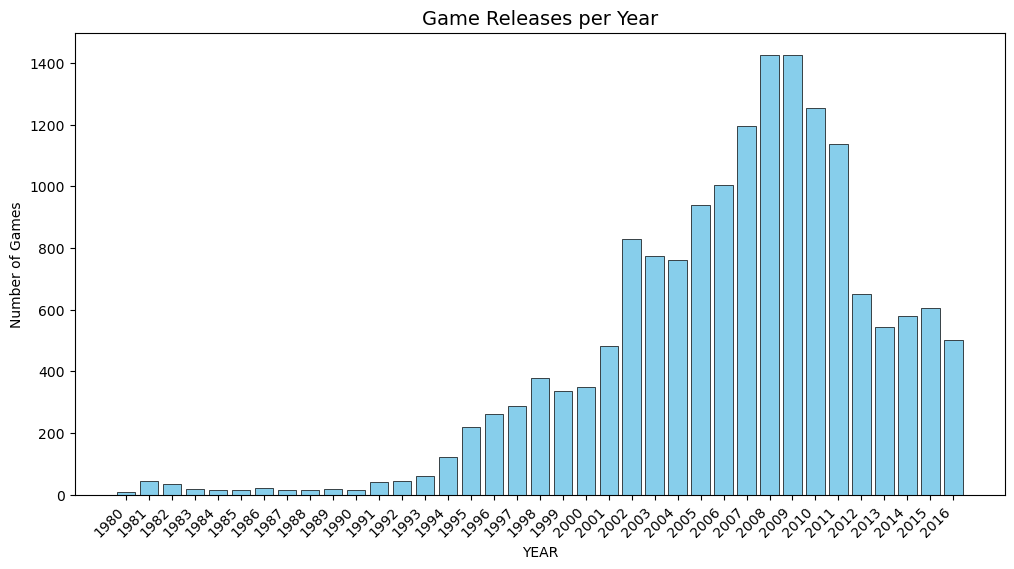

In [25]:
# Bar chart showing releases per year
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(year_stats.index.astype(str), year_stats['year_cnt'], color='skyblue', edgecolor='black', linewidth=0.5)
ax.set_title(f"Game Releases per Year", fontsize=14)
ax.set_xlabel("YEAR")
ax.set_ylabel("Number of Games")
plt.xticks(rotation=45, ha='right')
plt.show()

- 2002 is the year where there's a substantial jump in the number of releases (2001=482, 2002=829).
- The number of releases per year has declined since 2008-2009 even though the number of platforms has remained about the same.

## Platform Sales

In [26]:
# A table showing sales for every platform in each year
year_platform_table = pd.pivot_table(
    data=main,
    values='all_sales',
    index='year_category',
    columns='platform',
    aggfunc='sum',
    fill_value=np.nan,
    observed=True
)

# Column labels to be used for the bottom row for readability
column_labels_row = pd.DataFrame([year_platform_table.columns], 
                                 columns=year_platform_table.columns,
                                 index=['platform'])

# Output to HTML a version of the table with the column labels duplicated as a
# bottom row, and NaN values converted to blank cells
pd.concat([year_platform_table, column_labels_row]).fillna('').to_html('year_platform_table.html')

[year_platform_table.html](year_platform_table.html)

- There are 3 consoles succeeding a predecessor: Xbox 360 ➟ Xbox One, Wii ➟ Wii U, PS3 ➟ PS4. The 2017 sales for those predecessors will be minimal at best. In addition to those 3 successors, the 3DS, PC, and PS Vita showed 2016 sales that suggest they'll still be around in 2017. 2017 was the year the Nintendo Switch was released, which means it would succeed the Wii U. That makes for about 6-7 consoles with probable sales in 2017, which is less than the 9 to 11 console range since 2011.

- The 3DS, PS Vita, and Wii U have shown declining sales from their peaks in 2013, 2012, and 2014 respectively. PC sales have declined considerably from its 2010-2012 historical peak, though it's important to note the PC is a sort of "evergreen" platform category in that it doesn't become obsolete because of a succeeding platform model. This can be seen through its long run of sales since 1994. Since the 2016 sales are incomplete, it's unclear whether sales from the Xbox One and PS4 have peaked.

- 1985 sales for the Nintendo DS stands out, since the DS was released in 2004. I'll investigate what's going on there.

In [27]:
display(main[(main['platform'] == 'ds') & (main['year_category'] == 1985) & (main['all_sales'] >= 0)])

,name,platform,year_of_release,year_category,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
15952,Strongest Tokyo University Shogi DS,ds,1985,1985,action,0.0,0.0,0.02,0.0,0.02,NaN,NaN,NaN


A single entry was responsible for the 1985 Nintendo DS sales. After some research, it's clear the game in question was a Japan-only release from 2007. I'll update the `main` DF and make corrections to `year_platform_table`.

In [28]:
# Correct the year_of_release and year_category in `main` DF
main.loc[15952, ['year_of_release', 'year_category']] = 2007

# Correct sales values in year_platform_table
year_platform_table.loc[2007, 'ds'] += year_platform_table.loc[1985, 'ds']
year_platform_table.loc[1985, 'ds'] = np.nan

In [29]:
# Platforms sorted by total sales across all years
platform_sales = (
    main.groupby('platform', observed=True)['all_sales']
    .sum()
    .sort_values(ascending=False)
)

display(platform_sales)

platform
ps2     1252.15
x360     971.42
ps3      939.16
wii      907.51
ds       806.12
ps       730.86
gba      317.85
ps4      314.14
psp      294.05
pc       259.52
3ds      259.00
xb       257.74
gb       255.46
nes      251.05
n64      218.68
snes     200.04
gc       198.93
xone     159.32
2600      96.98
wiiu      82.19
psv       54.07
sat       33.59
gen       28.35
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: all_sales, dtype: float64

The top 6 platforms from this list are from the 5th to 7th generation of consoles. 4 of them are from the 7th generation, indicating a golden era (Xbox 360, Playstation 3, Nintendo Wii, Nintendo DS). The top 3 platforms on this list with potential sales in 2017 are the Playstation 4, the PC, and the Nintendo 3DS.

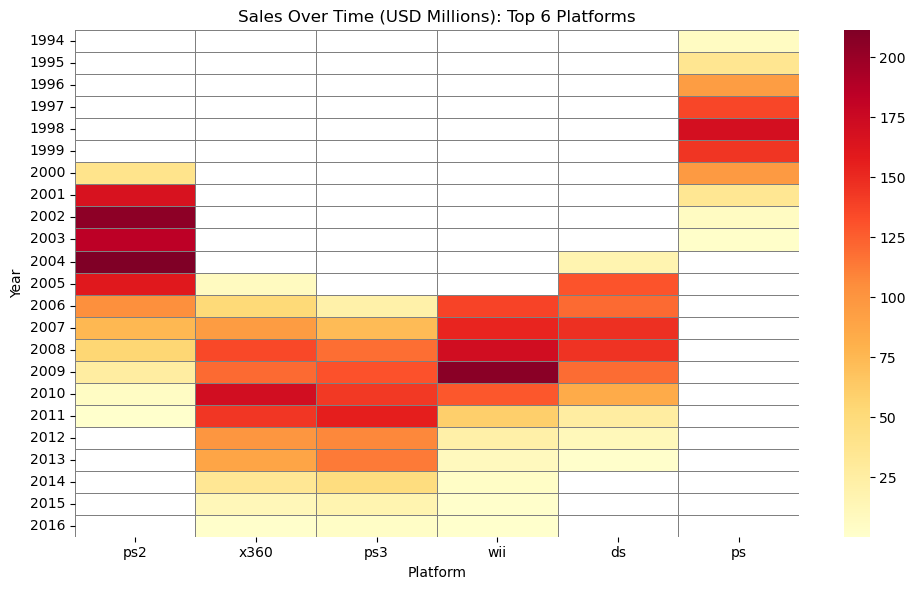

In [30]:
# Create a heatmap of the highest selling platforms of all time

# Specify the top platforms
platform_sales_top = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

# Extract the earliest year where there are sales for a top platform
min_year = year_platform_table[platform_sales_top].notna().any(axis=1).idxmax()

plt.figure(figsize=(10, 6))
sns.heatmap(year_platform_table.loc[year_platform_table.index >= min_year, platform_sales_top], cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title("Sales Over Time (USD Millions): Top 6 Platforms")
plt.ylabel("Year")
plt.xlabel("Platform")
plt.tight_layout()
plt.show()

## Platform Lifecycle
In order to predict potential sales in 2017, I had to analyze the typical lifecycle of a platform in a manner relevant to the data I have on those platforms with probable sales in 2017. I decided to focus on a general pattern I perceived where a platform will rise in sales until it reaches a peak year, to then gradually decline in sales until it exits the market. I analyzed 4 components of this pattern:

**1. first_year_sales**: The median number of sales a platform achieves in its first year.

**2. years_until_peak**: The median number of years it takes for a platform to reach its peak year in sales from its first year. 

**3. avg_rise_to_peak**: The median yearly rise in sales, in relation to its first year sales, that takes place from a platform's first year to its peak year, using the formula: 

(peak_year_sales - first_year_sales) / first_year_sales / years_until_peak

**4. avg_drop_from_peak**: The median yearly drop in sales, in relation to its peak year sales, that takes place from a platform's peak year in sales to its last year in the market, using the formula:

(peak_year_sales -  last_year_sales) /  peak_year_sales / years_after_peak

In [31]:
# This function will make use of year_platform_table which was created 
# previously to analyze yearly platform sales.
def sales_analysis(platform, year_block=None):
    # In order to avoid year spans with missing sales values, I provide the year
    # span for certain platforms through year_block. I also avoid including 2016 
    # in the analysis, as it's an incomplete year.
    if year_block is None:
        # Use all of the platform's yearly data and drop the surrounding
        # missing values. 
        s = year_platform_table[platform].dropna()
        first_year = s.index.min()  # Platform launch year
        last_year  = s.index.max()  # Most recent year with data
    else:
        # Otherwise use the specified year span
        first_year, last_year = year_block
        s = year_platform_table[platform].loc[first_year:last_year]

    # Identify the peak sales year
    peak_year = s.idxmax()

    # Extract sales values from key lifecycle years
    peak_year_sales  = s.loc[peak_year]    # Sales in the peak year
    first_year_sales = s.loc[first_year]   # Sales in the first year
    last_year_sales  = s.loc[last_year]    # Sales in the final year

    # Calculate the time intervals
    years_until_peak = peak_year - first_year     # Years from launch to peak
    years_after_peak = last_year - peak_year      # Years from peak to end

    # Calculate the yearly rise in sales from first to peak year
    if years_until_peak != 0:
        avg_rise_to_peak = (
            (peak_year_sales - first_year_sales)  # Total growth
            / first_year_sales                    # Relative to launch sales
            / years_until_peak                    # Averaged per year
        )
    else:
        # If peak occurred in launch year, define growth as infinite so that the
        # median calculation can still make use of it. 
        avg_rise_to_peak = float('inf')

    # Calculate yearly decline in sales after the peak year
    avg_drop_from_peak = (
        (peak_year_sales - last_year_sales)      # Total drop
        / peak_year_sales                        # Relative to peak
        / years_after_peak                       # Averaged per year
    )

    # Return key lifecycle metrics
    return (
        first_year_sales,   # Launch-year sales
        years_until_peak,   # Years until peak
        avg_rise_to_peak,   # Avg annual growth to peak
        avg_drop_from_peak  # Avg annual decline after peak
    )

# The year spans to be used for each platform, with "None" meaning all available
# data. I analysed only those platforms where it was clear its peak year was 
# present in the data. 
platform_year_blocks = {
    '2600': None,
    '3ds':  (2011, 2015),
    'dc':   (1998, 2002),
    'ds':   None,
    'gba':  None,
    'gc':   None,
    'n64':  None,
    'nes':  None,
    'ng':   None,
    'ps':   None,
    'ps2':  None,
    'ps3':  (2006, 2015),
    'psp':  None,
    'psv':  (2011, 2015),
    'sat':  None,
    'snes': None,
    'wii':  (2006, 2015),
    'wiiu': (2012, 2015),
    'ws':   None,
    'x360': (2005, 2015),
    'xb':   None
}

# Prepare DF where results will be stored
analysis_results = pd.DataFrame(columns=[
    'first_year_sales',
    'years_until_peak',
    'avg_rise_to_peak',
    'avg_drop_from_peak'
])

# Cycle through each platform and year span and feed it to the function
for platform, year_block in platform_year_blocks.items():
    # Store the values from the tuple returned by the function
    first_sales, years_to_peak, avg_rise, avg_drop = sales_analysis(platform, year_block)

    # Assign results to the prepared DataFrame, using the platform as the index
    analysis_results.loc[platform] = {
        'first_year_sales':   first_sales,
        'years_until_peak':   years_to_peak,
        'avg_rise_to_peak':   avg_rise,
        'avg_drop_from_peak': avg_drop
    }

# Display the rounded results for readability
display(analysis_results.round(2))

# The median values that will be used to construct a typical lifecycle
med_first_year_sales = analysis_results['first_year_sales'].median()
med_years_until_peak = analysis_results['years_until_peak'].median()
med_rise_to_peak     = analysis_results['avg_rise_to_peak'].median()
med_drop_from_peak   = analysis_results['avg_drop_from_peak'].median()

print(
    "  -MEDIAN VALUES-\n"
    f"  First Year Sales: {med_first_year_sales:.3f}\n"
    f"  Years Until Peak: {med_years_until_peak:.2f}\n"
    f"  Avg Rise to Peak: {med_rise_to_peak:.4f}\n"
    f"Avg Drop from Peak: {med_drop_from_peak:.4f}"
)

,first_year_sales,years_until_peak,avg_rise_to_peak,avg_drop_from_peak
2600,11.38,1,2.14,0.12
3ds,63.20,0,inf,0.14
dc,3.38,2,0.39,0.48
ds,17.27,3,2.50,0.16
gba,0.07,4,278.00,0.32
gc,26.34,1,0.97,0.20
n64,34.10,3,0.23,0.33
nes,10.96,2,1.94,0.11
ng,0.21,1,2.81,0.44
ps,6.03,4,6.78,0.20


  -MEDIAN VALUES-
  First Year Sales: 10.960
  Years Until Peak: 2.00
  Avg Rise to Peak: 2.1353
Avg Drop from Peak: 0.1990


Using the median values above, here is a typical lifecycle of a platform in terms of its yearly game sales:

Year 1 (Release Year)     : 10.96 million USD  
Year 2 (Rise to Peak)     : 34.36  
Year 3 (Peak Year)        : 57.77  
Year 4 (Descent from Peak): 46.27  
Year 5 (Descent Continued): 34.77  
Year 6 (Descent Continued): 23.28  
Year 7 (Descent Continued): 11.78  
Year 8 (Descent Continued):  0.29  
Year 9 (Exit from Market) :  0.00

# Filtered Dataset (2005-2016)
## `main_filt` DF

For the filtered dataset I focused on covering the platforms that still had a chance to produce sales in 2017. The earliest released non-pc platform that still had sales in 2016 was the x360. It was released in 2005 and so I chose that as my starting year. The filtered dataset will basically represent two generations of platforms: the previous generation fading in sales (ps3, wii, x360), and those meant to take over (3ds, ps4, psv, wiiu, xone). Also included will be the evergreen pc platform. 

In [32]:
# Filter `main` DF
platform_filt = ['3ds', 'pc', 'ps3', 'ps4', 'psv', 'wii', 'wiiu', 'x360', 'xone']

main_filt = main.loc[
    (
        (main['platform'] != 'pc') & 
        (main['platform'].isin(platform_filt))
    ) 
    | # Limiting PC years to 2005-2016
    (
        (main['platform'] == 'pc') &
        (main['year_category'].between(2005, 2016))
    )
]

# Remove unused categories from each category column
main_filt = main_filt.apply(
    lambda col: col.cat.remove_unused_categories() if col.dtype.name == 'category' else col
)

In [33]:
# Recreating/filtering year_platform_table
year_platform_table_filt = year_platform_table.loc[
    2005:2016,
    platform_filt
]

column_labels_row_filt = column_labels_row.loc[:, platform_filt]

pd.concat([year_platform_table_filt, column_labels_row_filt]).fillna('').to_html('year_platform_table_filt.html')

[year_platform_table_filt.html](year_platform_table_filt.html)

In [34]:
# Filtered platforms by total sales
platform_sales_filt = (
    main_filt.groupby('platform', observed=True)['all_sales']
    .sum()
    .sort_values(ascending=False)
)

display(platform_sales_filt)

platform
x360    971.42
ps3     939.16
wii     907.51
ps4     314.14
3ds     259.00
pc      167.79
xone    159.32
wiiu     82.19
psv      54.07
Name: all_sales, dtype: float64

platform,3ds,pc,ps3,ps4,psv,wii,wiiu,x360,xone
year_category,,,,,,,,,
2006,,-34.8,,,,,,525.7,
2007,,225.6,249.2,,,11.4,,84.8,
2008,,33.8,61.9,,,12.1,,41.8,
2009,,36.2,10.5,,,20.8,,-11.1,
2010,,43.6,8.6,,,-38.2,,41.4,
2011,,44.3,10.3,,,-53.4,,-15.4,
2012,-18.7,-33.7,-31.5,,249.7,-63.6,,-30.7,
2013,10.1,-46.7,5.5,,-34.6,-60.4,23.3,-11.2,
2014,-22.6,7.3,-57.8,284.8,12.4,-56.3,1.8,-60.8,185.2


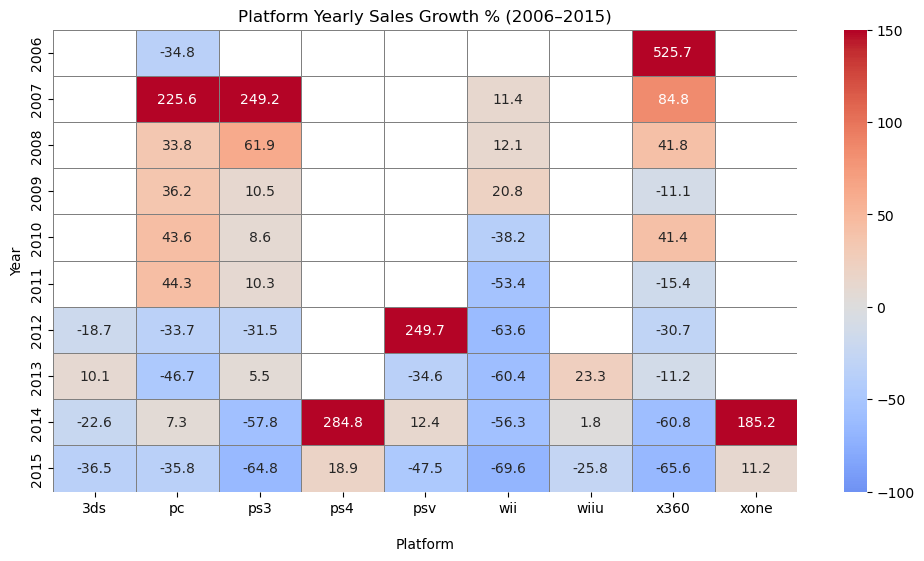

In [35]:
# Platform growth rates, excluding incomplete year 2016.
platform_growth_rate = (year_platform_table_filt.loc[2005:2015].pct_change() * 100).iloc[1:]
display(platform_growth_rate.round(1).fillna(''))

# Heatmap of growth rates
plt.figure(figsize=(12, 6))
sns.heatmap(platform_growth_rate, cmap='coolwarm', vmin=-100, vmax=150, center=0, annot=True, fmt=".1f", linewidths=0.5, linecolor='gray')
plt.title("Platform Yearly Sales Growth % (2006–2015)")
plt.xlabel("\nPlatform")
plt.ylabel("Year")
plt.show()

Excluding the PS4 and Xbox One, all platforms are in a decline from their peak years. Some of the highest growth rates are in a platform's 2nd year of sales. This may due to consoles generally not being released at the beginning of a year, resulting in the first year being an incomplete year of sale.  

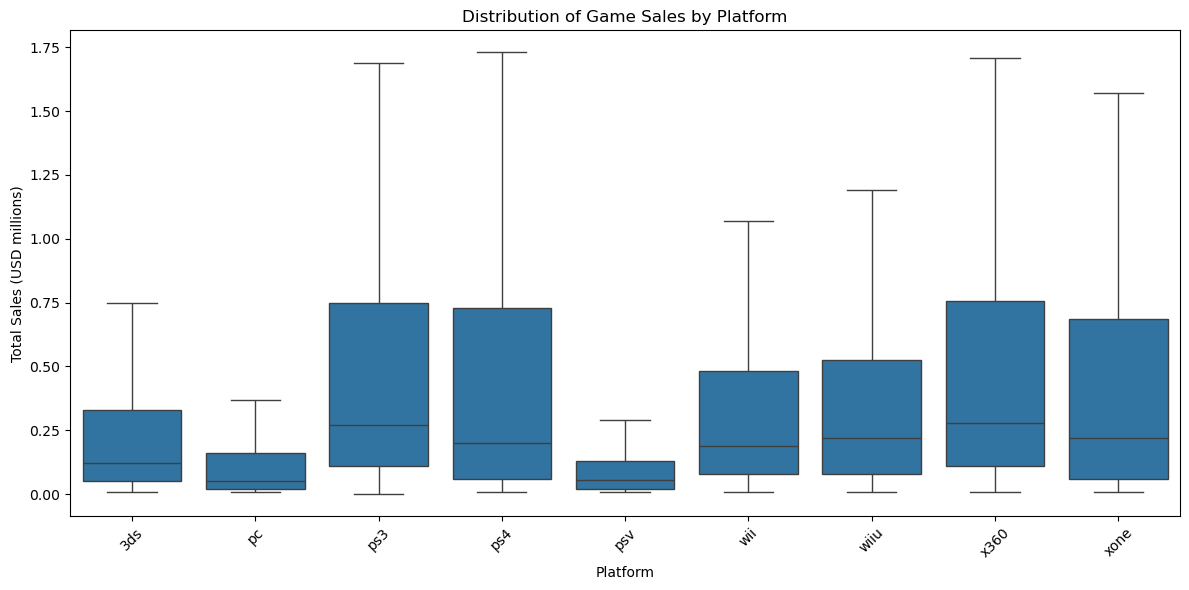

In [36]:
# Boxplot of platform sales
plt.figure(figsize=(12, 6))
sns.boxplot(data=main_filt, x='platform', y='all_sales', showfliers=False)

plt.title('Distribution of Game Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (USD millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Detailed statistics

The Xbox 360, PS3, and Wii are ranked #2-4 in historical sales. Their successors (Xbox One, PS4, and Wii U) have somewhat similar looking distributions. It's interesting how the Wii U has a more impressive distribution than its predecessor, yet as will be seen below in platform_sales_stats, has much less releases per year: Wii (120), Wii U (29). This trend of less releases per year than their predecessor is also seen with the other 2 modern successors: Xbox 360 (105), Xbox One (62). PS3 (121), PS4 (98).

In [37]:
# Additional stats for platform game sales
platform_sales_stats = pd.DataFrame(index=platform_filt, columns=[
    'total_sales',
    'num_releases',
    'avg_sales_per_release',
    'median_sales_per_release',
    'upper_median_sales', # the 75th percentile of sales
    'num_years',
    'avg_releases_per_year',
    'avg_sales_per_year',
    'median_sales_per_year',
    'avg_top3_sales_years', # Average sales of top 3 years
    'avg_rank_2013_2016' # This represents the average sales rank achieved by 
                         # each platform from 2013-2016, which represent the
                         # years where all 9 platforms had sales data. 
])
# Rank calculation for each year
ranks_2013_2016 = (
    year_platform_table_filt.loc[2013:2016]
    .rank(axis=1, ascending=False, method='min')
)

for plat in platform_filt:
    # Filtered releases for the current platform
    df_plat = main_filt[main_filt['platform'] == plat]
    # Yearly sales
    yearly_sales = year_platform_table_filt[plat].dropna()

    # Total sales
    total_sales = platform_sales_filt[plat]
    # Number of releases
    num_releases = df_plat.shape[0]
    # Average sales per release
    avg_sales_per_release = total_sales / num_releases
    # Median sales per release
    median_sales_per_release = df_plat['all_sales'].median()
    # Upper median (75th percentile) of sales per release
    upper_median_sales = df_plat['all_sales'].quantile(0.75)
    # Number of years with data
    num_years = yearly_sales.count()
    # Average releases per year
    avg_releases_per_year = num_releases / num_years
    # Average sales per year
    avg_sales_per_year = total_sales / num_years
    # Median sales per year
    median_sales_per_year = yearly_sales.median()
    # Average sales of top 3 years
    avg_top3_sales_years = yearly_sales.sort_values(ascending=False).head(3).mean()
    # Average rank 2013-2016
    avg_rank_2013_2016 = ranks_2013_2016[plat].mean()

    # Assign values to DataFrame
    platform_sales_stats.loc[plat] = [
        total_sales,
        num_releases,
        avg_sales_per_release,
        median_sales_per_release,
        upper_median_sales,
        num_years,
        avg_releases_per_year,
        avg_sales_per_year,
        median_sales_per_year,
        avg_top3_sales_years,
        avg_rank_2013_2016
    ]

platform_sales_stats = platform_sales_stats.astype(float).round(2).sort_values('total_sales', ascending=False).T

display(platform_sales_stats)

,x360,ps3,wii,ps4,3ds,pc,xone,wiiu,psv
total_sales,971.42,939.16,907.51,314.14,259.00,167.79,159.32,82.19,54.07
num_releases,1262.00,1329.00,1320.00,392.00,520.00,813.00,247.00,147.00,430.00
avg_sales_per_release,0.77,0.71,0.69,0.80,0.50,0.21,0.65,0.56,0.13
median_sales_per_release,0.28,0.27,0.19,0.20,0.12,0.05,0.22,0.22,0.06
upper_median_sales,0.76,0.75,0.48,0.73,0.33,0.16,0.68,0.52,0.13
num_years,12.00,11.00,11.00,4.00,6.00,12.00,4.00,5.00,6.00
avg_releases_per_year,105.17,120.82,120.00,98.00,86.67,67.75,61.75,29.40,71.67
avg_sales_per_year,80.95,85.38,82.50,78.54,43.17,13.98,39.83,16.44,9.01
median_sales_per_year,92.00,107.35,59.65,84.62,47.56,12.40,40.11,17.56,8.42
avg_top3_sales_years,149.71,143.29,177.02,96.05,57.04,27.51,46.79,20.41,12.89


The PS4 is the dominant platform leading into 2017, achieving the highest average yearly sales rank from 2013-2016 (1.75). Also note how it's #4 in total sales, yet has only been released for 4 years (#1 in average sales per release).

## Review Score Effect

In [38]:
# I'll choose the platform with the most available reviews
review_score_count = (
    main_filt.groupby('platform', observed=True)['critic_score'].count() + 
    main_filt.groupby('platform', observed=True)['user_score'].count()
).sort_values(ascending=False)

display(review_score_count)

platform
x360    1882
ps3     1693
pc      1247
wii     1145
ps4      509
xone     351
3ds      342
psv      263
wiiu     190
dtype: int64

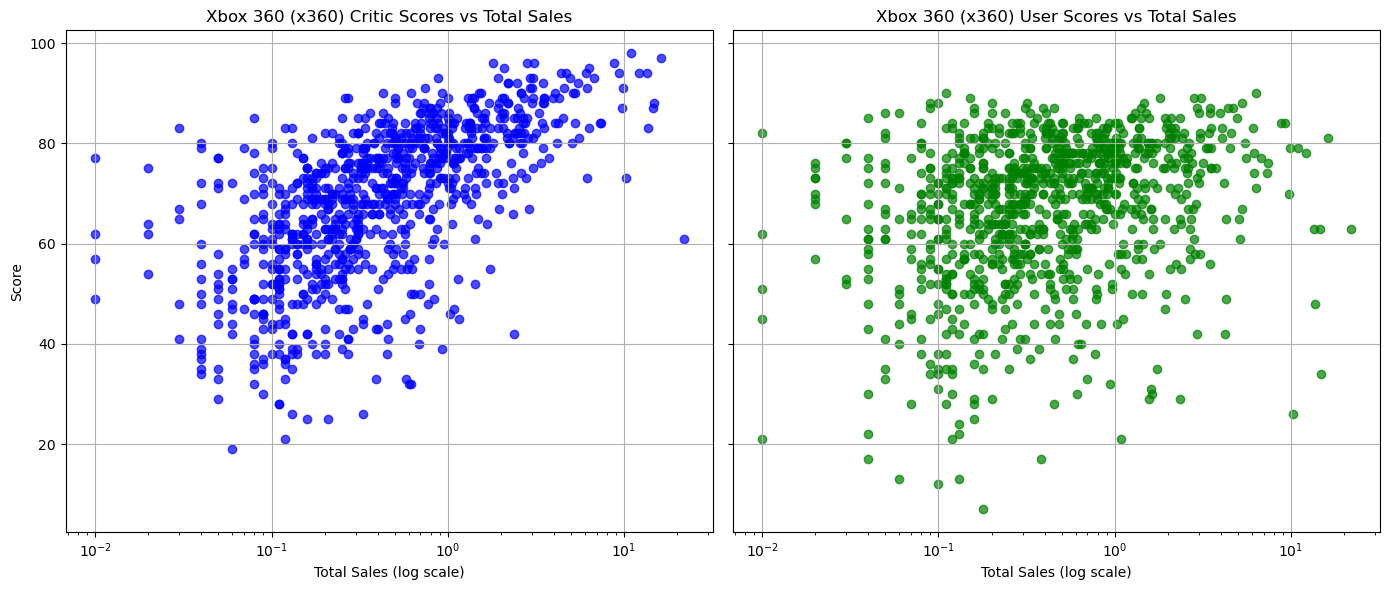


Pearson Correlation:



,critic_score,user_score,all_sales
critic_score,1.00,0.62,0.39
user_score,0.62,1.00,0.11
all_sales,0.39,0.11,1.00



Spearman Correlation:



,critic_score,user_score,all_sales
critic_score,1.00,0.59,0.66
user_score,0.59,1.00,0.29
all_sales,0.66,0.29,1.00


In [39]:
# Scatter plots of review scores vs total sales
x360_data = main_filt[main_filt['platform'] == 'x360']

# Side by side subplots to display each review type
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Critic score
axes[0].scatter(x360_data['all_sales'], x360_data['critic_score'], alpha=0.7, color='blue')
axes[0].set_title("Xbox 360 (x360) Critic Scores vs Total Sales")
axes[0].set_xlabel("Total Sales (log scale)")
axes[0].set_ylabel("Score")
axes[0].set_xscale('log')
axes[0].grid(True)

# User score
axes[1].scatter(x360_data['all_sales'], x360_data['user_score'] * 10, alpha=0.7, color='green')
axes[1].set_title("Xbox 360 (x360) User Scores vs Total Sales")
axes[1].set_xlabel("Total Sales (log scale)")
axes[1].set_xscale('log')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Correlations
x360_review_pcorrel = x360_data[['critic_score', 'user_score', 'all_sales']].corr(method='pearson').round(2)
x360_review_scorrel = x360_data[['critic_score', 'user_score', 'all_sales']].corr(method='spearman').round(2)

print("\nPearson Correlation:\n")
display(x360_review_pcorrel)
print("\nSpearman Correlation:\n")
display(x360_review_scorrel)

While critic and user scores for the Xbox 360 are somewhat correlated with each other (Pe: 0.62 | Sp: 0.59), the critic score is clearly more correlated with sales, as can be seen from the more defined upward structure of its scatter plot, as well as the correlation values:  

Critic Score: Pe: 0.39 | Sp: 0.66  
User Score: Pe: 0.11 | Sp: 0.29

## Cross-Platform Comparison

In [59]:
# Isolate cross-platform games
cross_platform_games = (
    main_filt[
        main_filt['year_category'].notna() & 
        main_filt.duplicated(subset=['name', 'year_category'], keep=False)
    ].copy()
)

# Create multi-index column 'name_year'
cross_platform_games['name_year'] = (
    cross_platform_games['name'] + 
    ' (' + cross_platform_games['year_category'].astype(str) + ')'
)

# Create pivot table
cross_platform_table = cross_platform_games.pivot(
    index='name_year',
    columns='platform',
    values='all_sales',
)

# The non-null counts represent number of cross-platform games for each platform
custom_info(cross_platform_table)

<class 'pandas.core.frame.DataFrame'>
Index: 1228 entries, 007: Quantum of Solace (2008) to uDraw Studio: Instant Artist (2011)
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   3ds     99 non-null     float64
 1   pc      376 non-null    float64
 2   ps3     921 non-null    float64
 3   ps4     303 non-null    float64
 4   psv     141 non-null    float64
 5   wii     338 non-null    float64
 6   wiiu    85 non-null     float64
 7   x360    887 non-null    float64
 8   xone    223 non-null    float64
dtypes: float64(9)



platform,3ds,pc,ps3,ps4,psv,wii,wiiu,x360,xone
name_year,,,,,,,,,
007: Quantum of Solace (2008),NaN,0.02,1.15,NaN,NaN,0.65,NaN,1.48,NaN
2010 FIFA World Cup South Africa (2010),NaN,NaN,1.23,NaN,NaN,0.43,NaN,0.85,NaN
2014 FIFA World Cup Brazil (2014),NaN,NaN,0.61,NaN,NaN,NaN,NaN,0.43,NaN
3rd Super Robot Wars Z Jigoku Hen (2014),NaN,NaN,0.23,NaN,0.19,NaN,NaN,NaN,NaN
3rd Super Robot Wars Z: Tengoku-Hen (2015),NaN,NaN,0.15,NaN,0.19,NaN,NaN,NaN,NaN
50 Cent: Blood on the Sand (2009),NaN,NaN,0.20,NaN,NaN,NaN,NaN,0.21,NaN
7 Days to Die (2016),NaN,NaN,NaN,0.14,NaN,NaN,NaN,NaN,0.05
AC/DC LIVE: Rock Band Track Pack (2008),NaN,NaN,0.24,NaN,NaN,0.26,NaN,0.23,NaN
Ace Combat: Assault Horizon (2011),NaN,NaN,0.74,NaN,NaN,NaN,NaN,0.49,NaN


In addition to total and average sales, I wanted to try out a points system where a platform is rewarded 1 point each time they outsold another platform in a cross-platform game. In case of a tie, 0.5 points is rewarded. In this manner, I can properly reward those platforms that outsold several other platforms in instances where a game was released on more than 2 platforms. In addition, I calculated the average number of points rewarded to a platform per cross-platform game. Finally, I calculated the percentage of all possible points collected by a platform, which is an attempt to avoid penalizing those platforms that consistently outsold its competitors in games released on fewer platforms, as well as for those platforms which simply didn't have many cross-platform games.

In [41]:
# Prepare DF that will store cross‐platform metrics for each platform
cross_pf_analysis = pd.DataFrame(
    index=platform_filt, 
    columns=[
        'game_cnt',      # Number of cross‐platform titles
        'total_sales',   # Sum of sales across those titles
        'avg_sales',     # Average sales per title
        'total_points',  # Total points earned in head‐to‐head comparisons
        'avg_points',    # Average points per cross‐platform title
        'pct_points'     # Percentage of all possible points earned
    ]
)
# Initialize point counters (float for later division)
cross_pf_analysis[['total_points', 'pct_points']] = 0.0

# Go through each game row, where each game row shows sales from every platform
for _, row in cross_platform_table.iterrows():
    # Drop platforms where this game wasn’t released (NaN)
    valid_cells = row.dropna()
    platforms   = valid_cells.index      # platforms with sales
    values      = valid_cells.values     # the sales from those platforms
    cell_cnt    = len(values)            # number of platforms for this game

    # Compare each unique pair of platforms in this game
    for i in range(cell_cnt - 1):
        for j in range(i + 1, cell_cnt):
            platform_i = platforms[i]
            platform_j = platforms[j]
            val_i = values[i]
            val_j = values[j]

            # Compare the sales of the current pair of platforms and distribute
            # points accordingly. Whenever there's a comparison between a pair 
            # of platforms, the number of comparisons for both platforms will be 
            # incremented in cross_pf_analysis['pct_points']
            if val_i > val_j:
                cross_pf_analysis.at[platform_i, 'total_points'] += 1
                cross_pf_analysis.at[platform_i, 'pct_points']   += 1
                cross_pf_analysis.at[platform_j, 'pct_points']   += 1

            elif val_j > val_i:
                cross_pf_analysis.at[platform_j, 'total_points'] += 1
                cross_pf_analysis.at[platform_i, 'pct_points']   += 1
                cross_pf_analysis.at[platform_j, 'pct_points']   += 1

            else:  # tie case
                cross_pf_analysis.at[platform_i, 'total_points'] += 0.5
                cross_pf_analysis.at[platform_j, 'total_points'] += 0.5
                cross_pf_analysis.at[platform_i, 'pct_points']   += 1
                cross_pf_analysis.at[platform_j, 'pct_points']   += 1

# Populate the number of cross‐platform games each platform appears in
cross_pf_analysis['game_cnt'] = cross_platform_table.count()

# Compute average points per game, rounding for readability
cross_pf_analysis['avg_points'] = (
    cross_pf_analysis['total_points'] 
    / cross_pf_analysis['game_cnt']
).round(2)

# Compute percentage of possible points captured
cross_pf_analysis['pct_points'] = (
    cross_pf_analysis['total_points'] 
    / cross_pf_analysis['pct_points']
).round(3)

# Sum total sales and calculate average sales per cross-platform title
cross_pf_analysis['total_sales'] = cross_platform_table.sum()
cross_pf_analysis['avg_sales'] = (
    cross_pf_analysis['total_sales'] 
    / cross_pf_analysis['game_cnt']
).round(2)

# Display platforms sorted by total points
display(cross_pf_analysis.sort_values(by='total_points', ascending=False))

,game_cnt,total_sales,avg_sales,total_points,avg_points,pct_points
ps3,934,722.91,0.77,1067.0,1.14,0.598
x360,899,733.70,0.82,921.0,1.02,0.536
ps4,303,272.31,0.90,563.5,1.86,0.847
wii,342,197.81,0.58,462.5,1.35,0.624
xone,223,135.08,0.61,229.0,1.03,0.412
3ds,100,29.95,0.30,123.5,1.24,0.420
wiiu,85,24.90,0.29,96.0,1.13,0.342
psv,141,21.66,0.15,92.0,0.65,0.315
pc,376,72.11,0.19,51.5,0.14,0.058


The rankings for total_points is similar to total_sales. The PC platform shows the usefulness of the points system by showing that even though it ranks third in cross-platform releases and 6th in total sales, its ability to outsell its competitors in those games is poor (last by a large margin in every points category). 

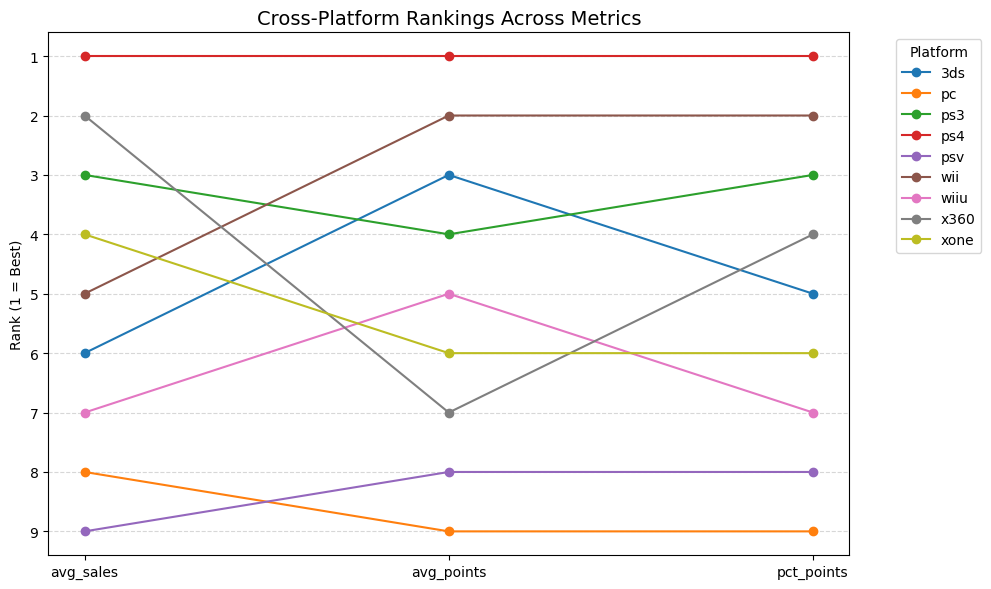

In [42]:
# A bump chart focusing on 3 of the metrics 

# Apply ranking (for plot purposes, higher is better)
metrics = ['avg_sales', 'avg_points', 'pct_points']
df_ranks = cross_pf_analysis[metrics].rank(ascending=False)

plt.figure(figsize=(10, 6))

# Plot a line for each platform across the metric columns
for platform in df_ranks.index:
    plt.plot(metrics, df_ranks.loc[platform], marker='o', label=platform)

# Invert y-axis so that rank 1 is at the top
plt.gca().invert_yaxis()

plt.title("Cross-Platform Rankings Across Metrics", fontsize=14)
plt.ylabel("Rank (1 = Best)")
plt.xticks(metrics)
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The PS4 shows its dominance in its ability to outsell its direct competitors, outselling about 85% of all cross-platform competitors (the Wii was a distant 2nd with 62%). The instances where the ranking for avg_sales differs significantly than those for the point metrics are interesting. For example, while the Wii ranks #5 in average sales per game, its ability to outsell its competitors in those games was strong. Also, while the Xbox 360 ranked #2 in average sales, its ability to outsell its competitors was less impressive.

## Genre Analysis

In [43]:
# Calculate the number of releases, total sales, and average sales for each genre
genre_analysis = (
    main_filt.groupby('genre', observed=True)
    .agg(
        count=('genre', 'count'),
        sales=('all_sales', 'sum'),
        avg_sales=('all_sales', 'mean')
    )
)
# Calculate the % share of releases and sales achieved by each genre
genre_analysis['count_share'] = genre_analysis['count'] / main_filt.shape[0]
genre_analysis['sales_share'] = genre_analysis['sales'] / genre_analysis['sales'].sum()

display(genre_analysis.round(2).sort_values(by='sales', ascending=False))

,count,sales,avg_sales,count_share,sales_share
genre,,,,,
action,1722,909.50,0.53,0.27,0.24
shooter,651,688.72,1.06,0.10,0.18
sports,874,665.09,0.76,0.14,0.17
misc,689,399.20,0.58,0.11,0.10
role-playing,566,335.62,0.59,0.09,0.09
racing,405,248.13,0.61,0.06,0.06
platform,200,195.20,0.98,0.03,0.05
fighting,247,142.50,0.58,0.04,0.04
simulation,300,119.89,0.40,0.05,0.03


While action games are the most prominent, it's ranked 8th out of 12 in average sales. Shooters are the most impressive, ranking 2nd and 1st in total and average sales. 

In [44]:
# Prepare 2 tables containing the yearly release share and yearly sales share of each genre
# These tables will be used to produce two ribbon charts visualizing the data

# A table with the number of releases for each genre in each year
genre_year_count = pd.crosstab(main_filt['year_category'], main_filt['genre'])

# A table with the yearly sales for each genre in each year
genre_year_sales = pd.crosstab(
    main_filt['year_category'], 
    main_filt['genre'],
    values=main_filt['all_sales'],
    aggfunc='sum'
)

# Calculate the shares by dividing each row value by that row's sum
genre_year_count_share = genre_year_count.div(genre_year_count.sum(axis=1), axis=0)
genre_year_sales_share = genre_year_sales.div(genre_year_sales.sum(axis=1), axis=0)

display(genre_year_count_share.round(2), genre_year_sales_share.round(2))

genre,action,adventure,fighting,misc,platform,puzzle,racing,role-playing,shooter,simulation,sports,strategy
year_category,,,,,,,,,,,,
2005,0.16,0.02,0.02,0.00,0.00,0.00,0.09,0.11,0.22,0.13,0.11,0.15
2006,0.17,0.01,0.04,0.07,0.03,0.03,0.09,0.10,0.12,0.10,0.17,0.08
2007,0.20,0.04,0.03,0.08,0.03,0.02,0.10,0.05,0.13,0.07,0.18,0.06
2008,0.19,0.06,0.04,0.12,0.05,0.03,0.08,0.05,0.10,0.06,0.18,0.04
2009,0.20,0.07,0.03,0.15,0.02,0.03,0.07,0.05,0.10,0.05,0.16,0.05
2010,0.20,0.05,0.03,0.16,0.03,0.02,0.07,0.06,0.10,0.05,0.20,0.04
2011,0.23,0.05,0.05,0.16,0.03,0.02,0.07,0.06,0.11,0.05,0.12,0.04
2012,0.38,0.07,0.05,0.07,0.02,0.01,0.06,0.10,0.09,0.03,0.09,0.02
2013,0.29,0.06,0.04,0.07,0.07,0.01,0.03,0.13,0.12,0.04,0.10,0.04


genre,action,adventure,fighting,misc,platform,puzzle,racing,role-playing,shooter,simulation,sports,strategy
year_category,,,,,,,,,,,,
2005,0.18,0.00,0.04,0.00,0.00,0.00,0.19,0.02,0.29,0.12,0.10,0.06
2006,0.08,0.00,0.02,0.16,0.01,0.01,0.07,0.05,0.11,0.03,0.45,0.00
2007,0.15,0.04,0.02,0.13,0.07,0.00,0.08,0.05,0.18,0.05,0.21,0.01
2008,0.23,0.02,0.06,0.11,0.05,0.01,0.14,0.06,0.13,0.04,0.14,0.02
2009,0.19,0.02,0.05,0.12,0.07,0.01,0.05,0.05,0.14,0.04,0.25,0.02
2010,0.20,0.02,0.03,0.18,0.06,0.00,0.07,0.07,0.16,0.03,0.17,0.02
2011,0.23,0.03,0.04,0.10,0.06,0.01,0.07,0.10,0.21,0.03,0.11,0.01
2012,0.34,0.01,0.03,0.06,0.05,0.00,0.04,0.11,0.21,0.04,0.09,0.01
2013,0.34,0.02,0.02,0.07,0.07,0.00,0.03,0.12,0.17,0.02,0.11,0.02


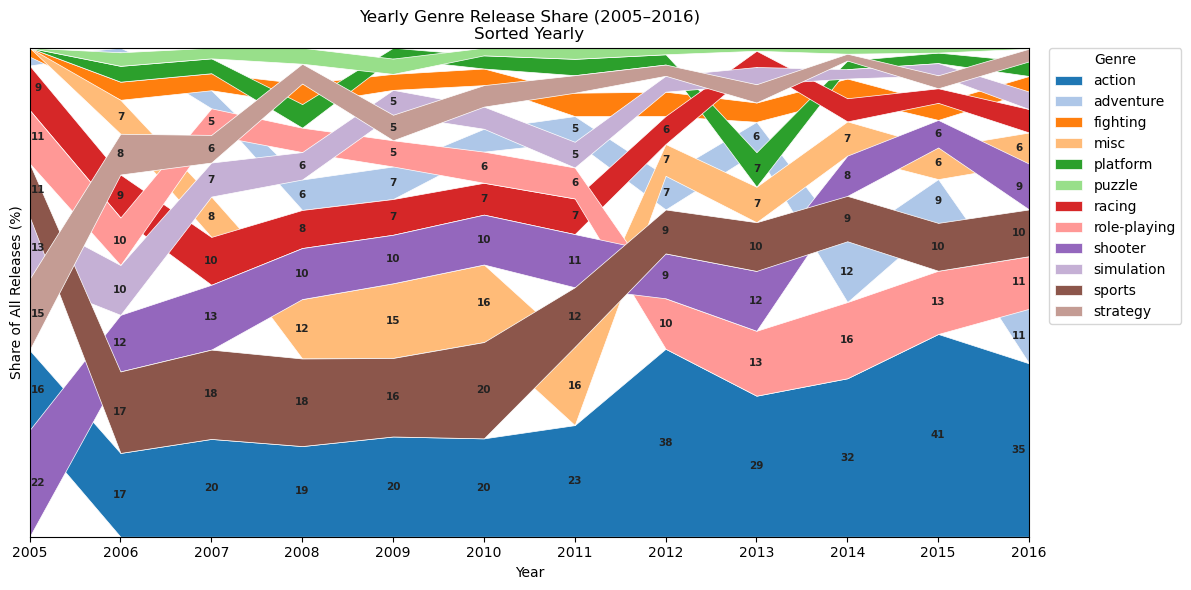

In [45]:
# A ribbon chart visualizing the yearly release share of each genre
df = genre_year_count_share.copy()

# Extract numeric year values and genre list
years = df.index.categories.astype(int)
genres = df.columns.tolist()

# Initialize a baseline DataFrame to stack each ribbon
# Start all genre ribbons at zero offset
baseline = pd.DataFrame(0.0, index=years, columns=genres)

# Build the bottom edge for each genre’s area, year by year
for y in years:
    # Sort genres by their share at year y (largest to smallest)
    sorted_genres = df.loc[y].sort_values(ascending=False).index
    
    cumsum = 0.0
    # For each genre, record the cumulative sum of all larger genres so that we 
    # know where this genre’s ribbon should start
    for g in sorted_genres:
        baseline.at[y, g] = cumsum
        cumsum += df.at[y, g]

# Choose a colormap that will map each genre ribbon to a distinct color
cmap = plt.get_cmap('tab20')
colors = {g: cmap(i % cmap.N) for i, g in enumerate(genres)}

fig, ax = plt.subplots(figsize=(12, 6))

# Draw each genre’s ribbon as a filled area between its baseline and baseline + share
for g in genres:
    ax.fill_between(
        years,
        baseline[g],            # Bottom edge of ribbon
        baseline[g] + df[g],    # Top edge = bottom + share
        color=colors[g],
        linewidth=0.5,
        edgecolor='white',      # White lines outline each ribbon
        label=g
    )

# Show percentage share values on ribbons when value >= 5%
threshold = 0.05
for y in years:
    for g in genres:
        height = df.at[y, g]
        if height >= threshold:
            # Compute the vertical position at the ribbon’s midpoint
            y_pos = baseline.at[y, g] + height / 2
            
            # Nudge text slightly for the first and last ribbon
            if y == years.min():
                x_text = y + 0.09
            elif y == years.max():
                x_text = y - 0.11
            else:
                x_text = y

            ax.text(
                x_text,
                y_pos,
                f"{height * 100:.0f}",  # Convert shares to whole values
                ha='center',
                va='center',
                fontsize=7.5,
                color='#222222',
                fontweight='bold'
            )

ax.set_xlabel("Year")
ax.set_ylabel("Share of All Releases (%)")
ax.set_title(
    "Yearly Genre Release Share (2005–2016)\n"
    "Sorted Yearly"
)
ax.set_xticks(years)
ax.set_yticks([])       # Hide y‑axis ticks
ax.set_ylim(0, 1)       # Shares range from 0% to 100%
ax.set_xlim(years.min(), years.max())

ax.legend(
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0,
    title="Genre"
)

plt.tight_layout()
plt.show()

The action genre has had the most releases in all but 1 year. Strategy, simulation, and shooting games have seen gradual declines, while adventure and role-playing games have seen an increase. Sports games ranked 2nd for 5 years before settling into 4th over the 5 most recent years. 

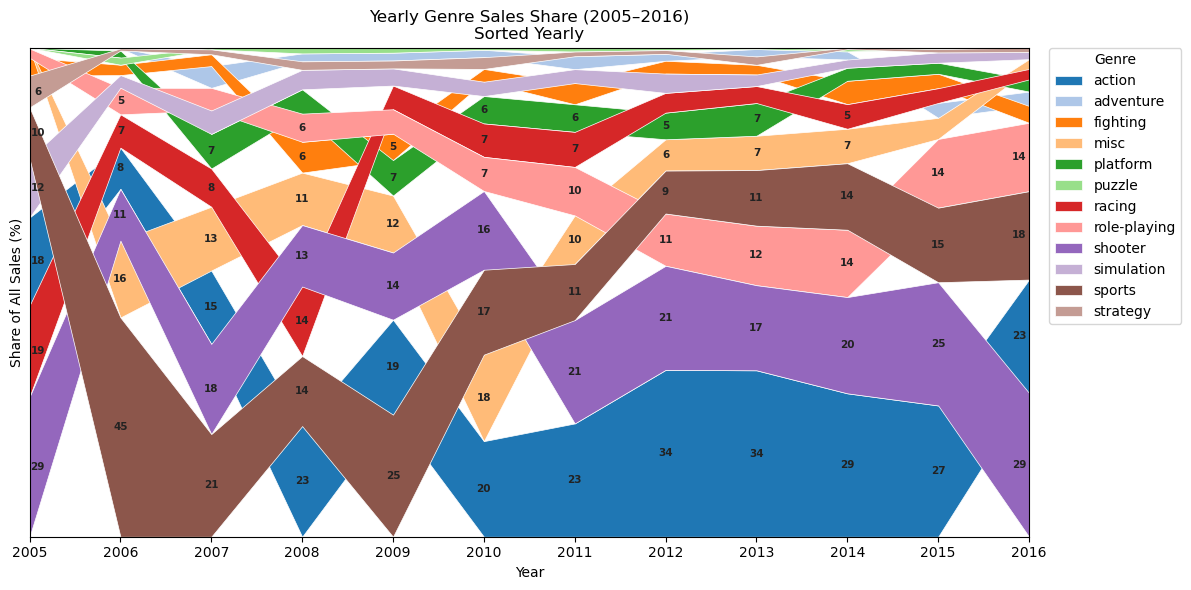

In [46]:
# A ribbon chart visualizing the yearly sales share of each genre
# Note that the only thing that changes for this ribbon chart is the table
# assigned to 'df'
df = genre_year_sales_share.copy()

years = df.index.categories.astype(int)
genres = df.columns.tolist()

baseline = pd.DataFrame(0.0, index=years, columns=genres)
for y in years:
    sorted_genres = df.loc[y].sort_values(ascending=False).index
    cumsum = 0.0
    for g in sorted_genres:
        baseline.at[y, g] = cumsum
        cumsum += df.at[y, g]

cmap = plt.get_cmap('tab20')
colors = {g: cmap(i % cmap.N) for i, g in enumerate(genres)}
fig, ax = plt.subplots(figsize=(12, 6))

for g in genres:
    ax.fill_between(
        years,
        baseline[g],
        baseline[g] + df[g],
        color=colors[g],
        linewidth=0.5,
        edgecolor='white',
        label=g
    )

threshold = 0.05

for y in years:
    for g in genres:
        height = df.at[y, g]
        if height >= threshold:
            y_pos = baseline.at[y, g] + height / 2
            if y == years.min():
                x_text = y + 0.09
            elif y == years.max():
                x_text = y - 0.11
            else:
                x_text = y

            ax.text(
                x_text,
                y_pos,
                f"{height * 100:.0f}",
                ha='center',
                va='center',
                fontsize=7.5,
                color='#222222',
                fontweight='bold'
            )

ax.set_xlabel("Year")
ax.set_ylabel("Share of All Sales (%)")
ax.set_title(
    "Yearly Genre Sales Share (2005–2016)\n"
    "Sorted Yearly"
)
ax.set_xticks(years)
ax.set_yticks([])
ax.set_ylim(0, 1)
ax.set_xlim(years.min(), years.max())

ax.legend(
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0,
    title="Genre"
)

plt.tight_layout()
plt.show()

Action and shooting games have had the top sales share from 2011-2016. Racing and miscellaneous shares have declined, while role-playing shares have gone up. While sports shares have declined from its peak, the genre has steadily ranked from 3rd to 4th from 2010-2016.

# Regional Analysis

In [47]:
# A table with several regional stats
regions = ['na_sales', 'eu_sales', 'jp_sales']

region_stats = pd.DataFrame(columns=[
    'num_releases', # Number of releases in each region
    'pct_of_releases', # % of all games released in this region
    'total_sales', # Total sales in each region
    'pct_of_sales', # % share of sales in all regions
    'avg_sales_per_release', 
    'avg_user_score', # Average user score of games in this region
    'avg_critic_score',
    'exclusive_titles' # Number of games solely released in this region
])

total_games = len(main_filt)

# Sum of all sales from all regions
total_sales_all_regions = main_filt[regions].values.sum()

# For exclusive titles, isolate the rows where a single region has sales > 0
exclusive_mask = (main_filt[regions] > 0).sum(axis=1) == 1

for region in regions:
    sales = main_filt[region]
    mask = sales > 0 # When true, the game is considered released for that region
    num_releases = mask.sum() 
    total_sales = sales.sum()
    
    avg_user_score = main_filt.loc[mask, 'user_score'].mean()
    avg_critic_score = main_filt.loc[mask, 'critic_score'].mean()
    
    region_stats.loc[region] = {
        'num_releases': num_releases,
        'pct_of_releases': round(num_releases / total_games, 2),
        'total_sales': round(total_sales, 2),
        'pct_of_sales': round(total_sales / total_sales_all_regions, 2),
        'avg_sales_per_release': round(total_sales / num_releases, 2),
        'avg_user_score': round(avg_user_score, 2),
        'avg_critic_score': round(avg_critic_score, 1),
        # Within the rows where an exclusive title was detected, count the number 
        # of times a region has sales > 0
        'exclusive_titles': (main_filt[exclusive_mask][region] > 0).sum()
    }

region_stats = region_stats.rename(index={
    'na_sales': 'NA',
    'eu_sales': 'EU',
    'jp_sales': 'JP'
})

display(region_stats)

,num_releases,pct_of_releases,total_sales,pct_of_sales,avg_sales_per_release,avg_user_score,avg_critic_score,exclusive_titles
NA,4669,0.72,1874.73,0.54,0.40,6.73,69.3,957
EU,4465,0.69,1258.19,0.37,0.28,6.82,70.9,799
JP,2401,0.37,313.84,0.09,0.13,7.24,74.1,925


NA is the top region in terms of releases, sales, and average sales. The average game released in Japan has a higher user and critic score. 39% of all releases in Japan are exclusive to Japan.

## Regional Comparison of Top Platforms

In [48]:
top_platforms = ['3ds', 'pc', 'ps4', 'xone']
years = [2013, 2014, 2015, 2016]

# I chose the platforms guaranteed to have sales in 2017. In addition, I limited
# the years to those where all four of the platforms have sales data.
top_platform_data = main_filt[
    (main_filt['platform'].isin(top_platforms)) &
    (main_filt['year_category'].isin(years))
].copy()

# Total releases and sales by region
total_releases_by_region = {
    r: (top_platform_data[r] > 0).sum() for r in regions
}
total_sales_by_region = {
    r: top_platform_data[r].sum() for r in regions
}

metrics = []

for platform in top_platforms:
    current_pf = top_platform_data[top_platform_data['platform'] == platform]
    # A release is interpreted as an instance where a region's sale value is > 0
    release_mask = {r: (current_pf[r] > 0) for r in regions}    
    # Number of releases per region
    release_counts = {r: release_mask[r].sum() for r in regions}
    # Total sales per region
    sales_sums = {r: current_pf[r].sum() for r in regions}
    # Average sales per game per region
    avg_sales = {
        r: sales_sums[r] / release_counts[r] if release_counts[r] > 0 else np.nan
        for r in regions
    }
    # Average user score per region
    avg_user = {
        r: current_pf.loc[release_mask[r], 'user_score'].mean()
        for r in regions
    }
    # Average critic score per region
    avg_critic = {
        r: current_pf.loc[release_mask[r], 'critic_score'].mean()
        for r in regions
    }
    # Total releases and sales in all regions  
    total_releases = sum(release_counts.values())
    total_sales = sum(sales_sums.values())

    # Construct each platform row of data through a dictionary comprehension
    row = { # Total releases in each region
        f'{r}_releases': release_counts[r] for r in regions
    } | { # The % share a platform has in each region's total releases
        f'share_of_{r}_releases': release_counts[r] / total_releases_by_region[r]
        for r in regions
    } | { # The % of a platform's total releases in each region
        f'pct_{r}_release': release_counts[r] / total_releases
        for r in regions
    } | { # Total sales in each region
        f'{r}': sales_sums[r] for r in regions
    } | { # The % share a platform has in each region's total sales
        f'share_of_{r}': sales_sums[r] / total_sales_by_region[r]
        for r in regions
    } | { # The % of a platform's total sales in each region
        f'pct_{r}': sales_sums[r] / total_sales
        for r in regions
    } | { # Average sales figure in each region
        f'avg_{r}': avg_sales[r] for r in regions
    } | { # Average user rating in each region
        f'avg_{r}_user_rating': avg_user[r] for r in regions
    } | { # Average critic rating in each region
        f'avg_{r}_critic_rating': avg_critic[r] for r in regions
    }
    # Convert each dictionary into a Series and append it to metrics, resulting
    # in a list of 4 Series (1 for each platform)
    metrics.append(pd.Series(row, name=platform))
# Convert 'metrics' into a DF
platform_region_stats = pd.DataFrame(metrics).round(2).T

# Clean up column names
platform_region_stats.index = platform_region_stats.index.str.replace('_sales_release', '_release', regex=False)
platform_region_stats.index = platform_region_stats.index.str.replace('avg_([a-z]{2})_sales_', r'avg_\1_', regex=True)

display(platform_region_stats)

,3ds,pc,ps4,xone
na_releases,119.00,84.00,294.00,227.00
eu_releases,122.00,187.00,290.00,218.00
jp_releases,235.00,0.00,223.00,22.00
share_of_na_releases,0.16,0.12,0.41,0.31
share_of_eu_releases,0.15,0.23,0.35,0.27
share_of_jp_releases,0.49,0.00,0.46,0.05
pct_na_release,0.25,0.31,0.36,0.49
pct_eu_release,0.26,0.69,0.36,0.47
pct_jp_release,0.49,0.00,0.28,0.05
na_sales,38.20,11.11,108.74,93.12


Some highlights:

- The PS4 has strong release shares in each region.  
- The PC released 69% of its games in the EU, while in Japan it was 0%.
- The Xbox One only released 5% of its games in Japan.
- The PS4 is #1 in terms of sales in NA and EU.
- The 3DS dominates sales in Japan (81% share).
- The Xbox One has most of its sales in NA (64%).
- The 3DS is the most consistent in terms of average sales per game in each region (NA: 0.32, EU: 0.25, JP: 0.29)
- The average user and critic rating for games released in Japan are both higher for 3 out of the 4 platforms. 

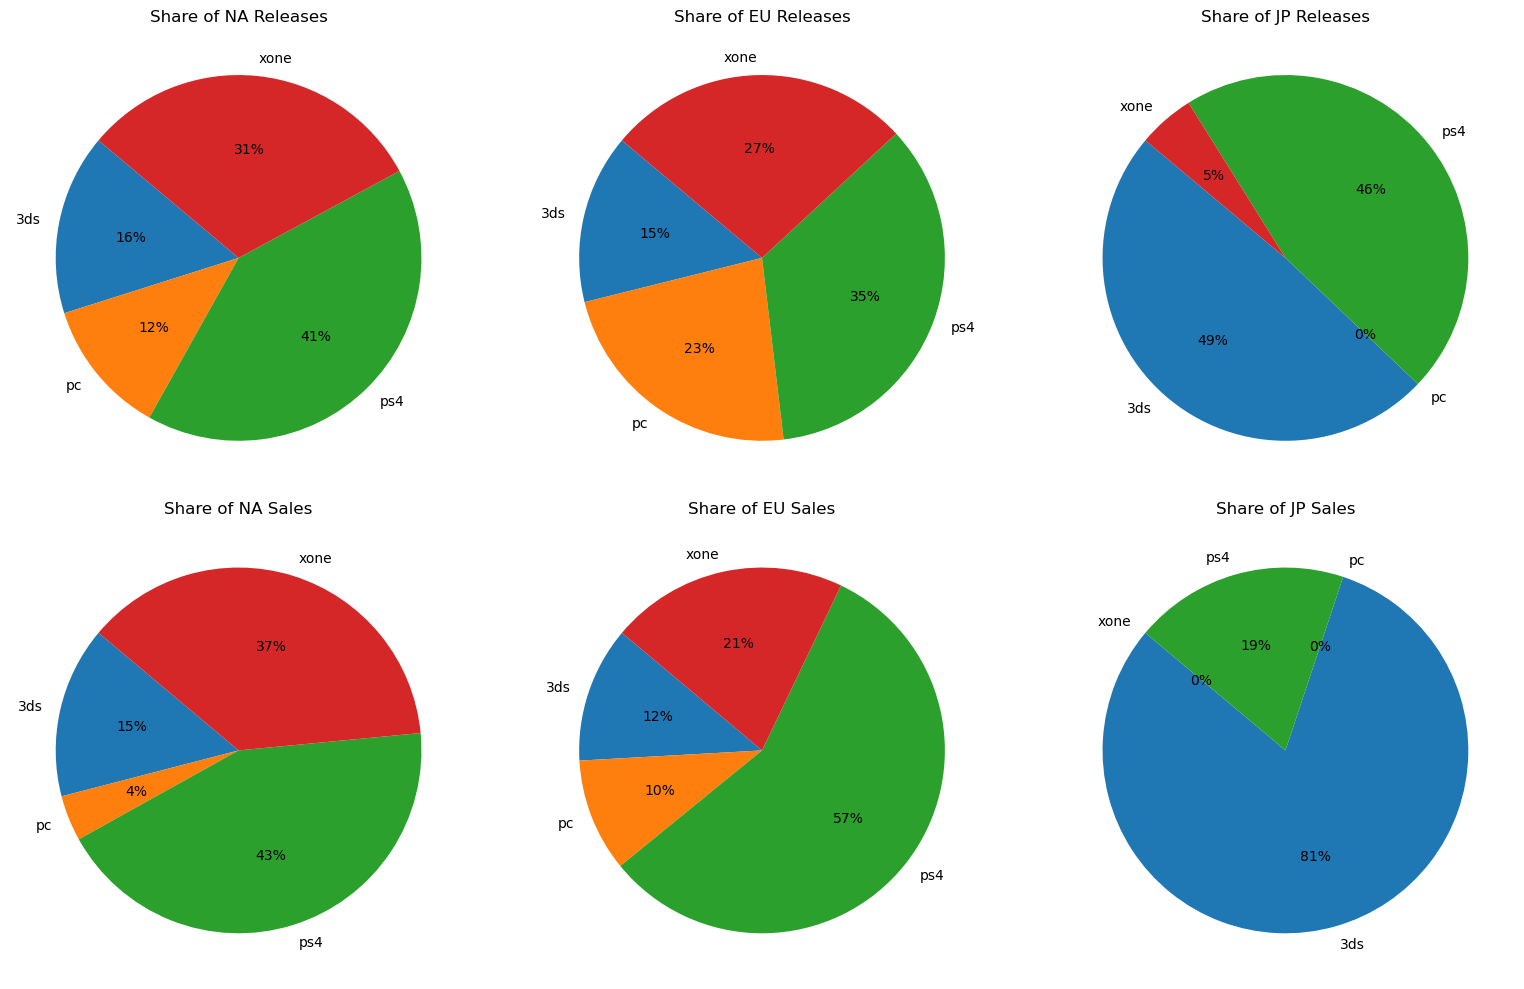

In [49]:
# Pie charts showing platform share of releases and sales in each region

# Extract relevant rows
release_rows = [f'share_of_{r}_releases' for r in ['na', 'eu', 'jp']]
sales_rows   = [f'share_of_{r}_sales' for r in ['na', 'eu', 'jp']]
release_data = platform_region_stats.loc[release_rows]
sales_data   = platform_region_stats.loc[sales_rows]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

def plot_pie(ax, data, title):
    data = data.dropna()
    ax.pie(data, labels=data.index, autopct=lambda p: f'{int(round(p))}%', startangle=140)
    ax.set_title(title)

# Plot share of releases (first row)
for i, region in enumerate(['NA', 'EU', 'JP']):
    plot_pie(
        axes[0, i],
        release_data.loc[f'share_of_{region.lower()}_releases'],
        f"Share of {region} Releases"
    )

# Plot share of sales (second row)
for i, region in enumerate(['NA', 'EU', 'JP']):
    plot_pie(
        axes[1, i],
        sales_data.loc[f'share_of_{region.lower()}_sales'],
        f"Share of {region} Sales"
    )

plt.tight_layout()
plt.show()

An interesting data point is whether a platform is able to achieve a higher share of sales than its share of releases. The PS4 is the only platform that achieves this in 2 regions (NA and EU).

## Regional Comparison of Top Genres

In [50]:
# The structure for this regional analysis of top genres is almost identical to 
# the one performed for top platforms

top_genres = ['action', 'shooter', 'sports', 'misc', 'role-playing']

top_genre_data = main_filt[
    (main_filt['genre'].isin(top_genres))
].copy()

total_releases_by_region = {
    r: (top_genre_data[r] > 0).sum() for r in regions
}
total_sales_by_region = {
    r: top_genre_data[r].sum() for r in regions
}

metrics = []

for genre in top_genres:
    current_pf = top_genre_data[top_genre_data['genre'] == genre]
    release_mask = {r: (current_pf[r] > 0) for r in regions}
    release_counts = {r: release_mask[r].sum() for r in regions}
    sales_sums = {r: current_pf[r].sum() for r in regions}
    avg_sales = {
        r: sales_sums[r] / release_counts[r] if release_counts[r] > 0 else np.nan
        for r in regions
    }
    avg_user = {
        r: current_pf.loc[release_mask[r], 'user_score'].mean()
        for r in regions
    }
    avg_critic = {
        r: current_pf.loc[release_mask[r], 'critic_score'].mean()
        for r in regions
    }
    total_releases = sum(release_counts.values())
    total_sales = sum(sales_sums.values())

    row = {
        f'{r}_releases': release_counts[r] for r in regions
    } | {
        f'share_of_{r}_releases': release_counts[r] / total_releases_by_region[r]
        for r in regions
    } | {
        f'pct_{r}_release': release_counts[r] / total_releases
        for r in regions
    } | {
        f'{r}': sales_sums[r] for r in regions
    } | {
        f'share_of_{r}': sales_sums[r] / total_sales_by_region[r]
        for r in regions
    } | {
        f'pct_{r}': sales_sums[r] / total_sales
        for r in regions
    } | {
        f'avg_{r}': avg_sales[r] for r in regions
    } | {
        f'avg_{r}_user_rating': avg_user[r] for r in regions
    } | {
        f'avg_{r}_critic_rating': avg_critic[r] for r in regions
    }

    metrics.append(pd.Series(row, name=genre))
    
genre_region_stats = pd.DataFrame(metrics).round(2).T

genre_region_stats.index = genre_region_stats.index.str.replace('_sales_release', '_release', regex=False)
genre_region_stats.index = genre_region_stats.index.str.replace('avg_([a-z]{2})_sales_', r'avg_\1_', regex=True)

display(genre_region_stats)

,action,shooter,sports,misc,role-playing
na_releases,1256.00,566.00,696.00,512.00,353.00
eu_releases,1264.00,540.00,559.00,412.00,363.00
jp_releases,726.00,246.00,186.00,164.00,395.00
share_of_na_releases,0.37,0.17,0.21,0.15,0.10
share_of_eu_releases,0.40,0.17,0.18,0.13,0.12
share_of_jp_releases,0.42,0.14,0.11,0.10,0.23
pct_na_release,0.39,0.42,0.48,0.47,0.32
pct_eu_release,0.39,0.40,0.39,0.38,0.33
pct_jp_release,0.22,0.18,0.13,0.15,0.36
na_sales,425.76,357.33,340.71,222.45,138.66


Some highlights:

- The Action genre has the highest release share in all 3 regions.
- Role-playing games are ranked last in sales share in NA (9%) and EU (9%), but is ranked 1st in JP with 35%.
- Shooters are ranked 1st in NA and EU in terms of average sales, but are ranked last in JP. In Japan, role-playing games are ranked 1st. 
- Japanese games have a higher average user rating in every genre, and a higher critic rating in all genres except for role-playing games.

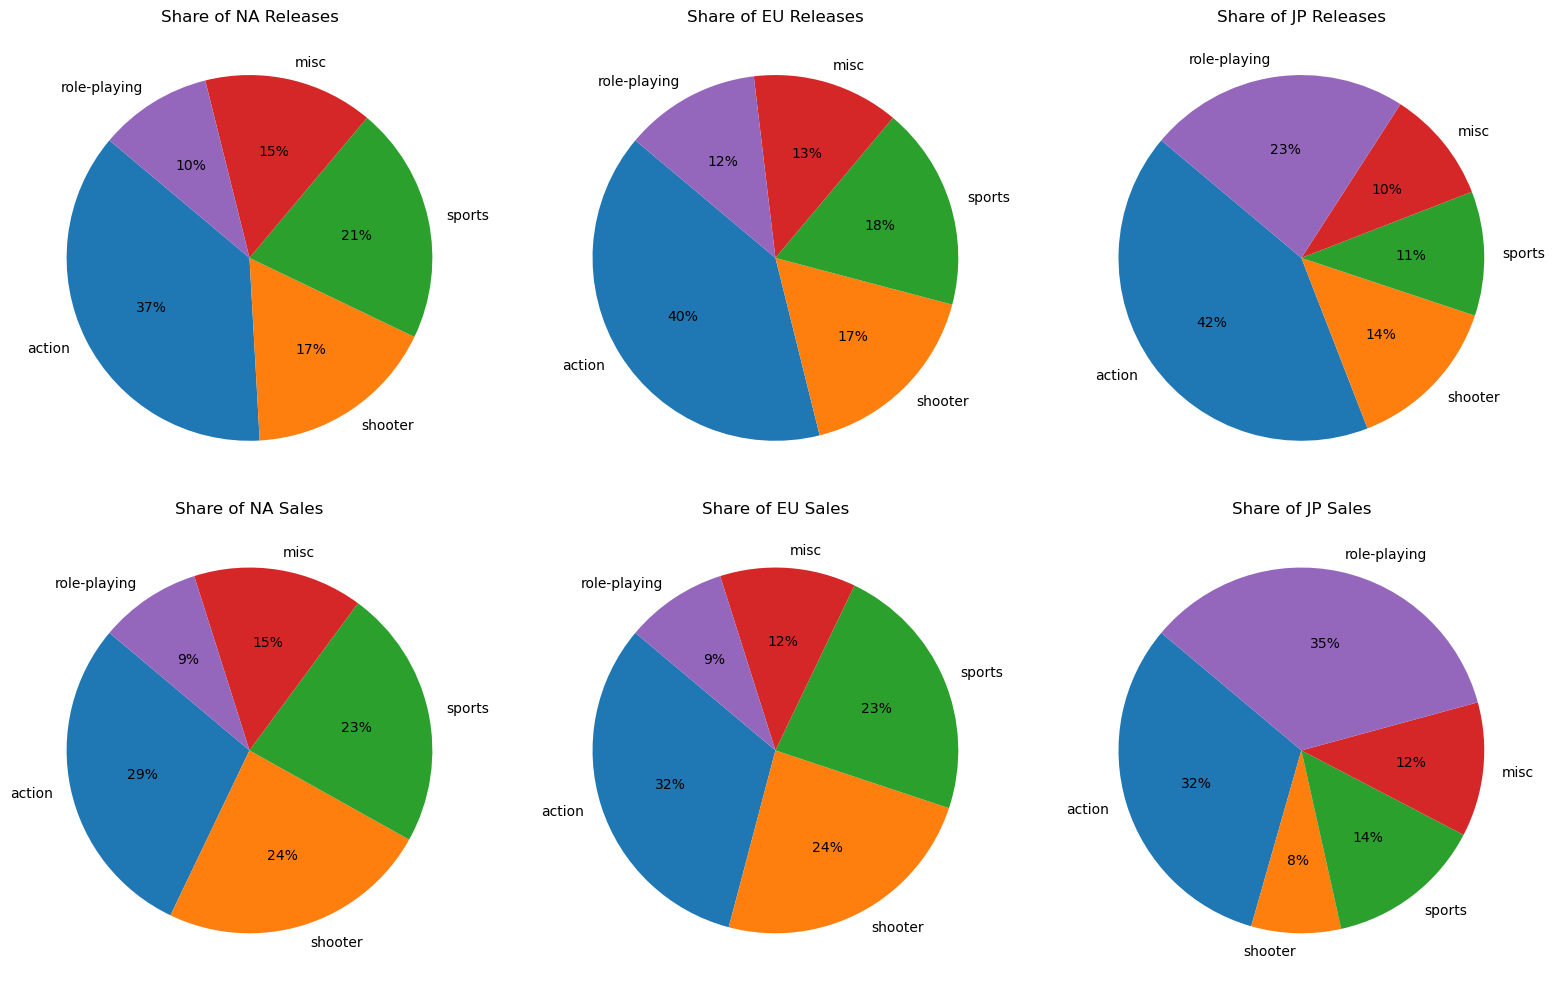

In [51]:
# Pie charts showing genre share of releases and sales in each region

# Extract relevant rows
release_rows = [f'share_of_{r}_releases' for r in ['na', 'eu', 'jp']]
sales_rows   = [f'share_of_{r}_sales' for r in ['na', 'eu', 'jp']]
release_data = genre_region_stats.loc[release_rows]
sales_data   = genre_region_stats.loc[sales_rows]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plot share of releases (first row)
for i, region in enumerate(['NA', 'EU', 'JP']):
    plot_pie(
        axes[0, i],
        release_data.loc[f'share_of_{region.lower()}_releases'],
        f"Share of {region} Releases"
    )

# Plot share of sales (second row)
for i, region in enumerate(['NA', 'EU', 'JP']):
    plot_pie(
        axes[1, i],
        sales_data.loc[f'share_of_{region.lower()}_sales'],
        f"Share of {region} Sales"
    )

plt.tight_layout()
plt.show()

Sports is the only genre with a sales share that's higher than its release share in every region. On the other hand, the action genre underperforms its release share in every region. 

## Regional Effects of ESRB Ratings

In [52]:
# 'ao' (Adult Only) was excluded as there were no games with that rating in the
# filtered dataset
all_esrbs = ['e', 'e10+', 't', 'm']

esrb_data = main_filt[
    (main_filt['rating'].isin(all_esrbs))
].copy()

# Total releases and sales by region
total_releases_by_region = {
    r: (esrb_data[r] > 0).sum() for r in regions
}
total_sales_by_region = {
    r: esrb_data[r].sum() for r in regions
}

metrics = []

for esrb in all_esrbs:
    current_pf = esrb_data[esrb_data['rating'] == esrb]
    # A release is interpreted as an instance where a region's sale value is > 0
    release_mask = {r: (current_pf[r] > 0) for r in regions}    
    # Number of releases per region
    release_counts = {r: release_mask[r].sum() for r in regions}
    # Total sales per region
    sales_sums = {r: current_pf[r].sum() for r in regions}
    # Average sales per game per region
    avg_sales = {
        r: sales_sums[r] / release_counts[r] if release_counts[r] > 0 else np.nan
        for r in regions
    }
    # Average user score per region
    avg_user = {
        r: current_pf.loc[release_mask[r], 'user_score'].mean()
        for r in regions
    }
    # Average critic score per region
    avg_critic = {
        r: current_pf.loc[release_mask[r], 'critic_score'].mean()
        for r in regions
    }
    # Total releases and sales in all regions  
    total_releases = sum(release_counts.values())
    total_sales = sum(sales_sums.values())
    # The % share of releases in each region
    share_releases = {
        r: release_counts[r] / total_releases_by_region[r]
        for r in regions
    }
    # The % share of sales in each region
    share_sales = {
        r: sales_sums[r] / total_sales_by_region[r]
        for r in regions
    }

    # Construct each esrb row of data through a dictionary comprehension
    row = {
        f'{r}_releases': release_counts[r] for r in regions
    } | {
        f'share_of_{r}_releases': share_releases[r]
        for r in regions
    } | {
        f'pct_{r}_release': release_counts[r] / total_releases
        for r in regions
    } | {
        f'{r}': sales_sums[r] for r in regions
    } | {
        f'share_of_{r}': share_sales[r]
        for r in regions
    } | {
        f'pct_{r}': sales_sums[r] / total_sales
        for r in regions
    } | {
        f'avg_{r}': avg_sales[r] for r in regions
    } | {
        f'{r}_sales_release_ratio': (share_sales[r] / share_releases[r])
        for r in regions
    } | {        
        f'avg_{r}_user_rating': avg_user[r] for r in regions
    } | {
        f'avg_{r}_critic_rating': avg_critic[r] for r in regions
    }    
    # Convert each dictionary into a Series and append it to metrics, resulting
    # in a list of 5 Series (1 for each esrb)
    metrics.append(pd.Series(row, name=esrb))

esrb_region_stats = pd.DataFrame(metrics)
# Correct data types
esrb_region_stats[['na_sales_releases', 'eu_sales_releases', 'jp_sales_releases']] = (
    esrb_region_stats[['na_sales_releases', 'eu_sales_releases', 'jp_sales_releases']].astype('Int64')
)

# Calculate the average regional sales rank for games under each ESRB rating

# Create DF that will store the ranks and ESRB ratings
regional_rank = pd.DataFrame(index=esrb_data.index)
# Rank each region separately
for r in regions:
    valid_sales = esrb_data[r] > 0
    regional_rank[r] = (
        esrb_data.loc[valid_sales, r]
        .rank(ascending=False, method='average')
    )
# Duplicate the ratings from esrb_data
regional_rank['rating'] = esrb_data['rating'].values    
# Group by ESRB rating and region, and then average the ranks
avg_rank_by_rating = (
    regional_rank
    .groupby('rating', observed=True)[regions]
    .mean()
    .round(0)
    .astype('Int64')
    .rename(columns={r: f'avg_rank_{r}' for r in regions})
)

# Calculate the max rank in each region in order to normalize each average rank
max_ranks = {
    r: regional_rank[r].notna().sum()
    for r in regions
}

esrb_region_stats = esrb_region_stats.round(2).T # For display readability

# Add the ranking data to esrb_region_stats
avg_rank_by_rating.index.name = None # Remove index name for concat
esrb_region_stats = pd.concat([esrb_region_stats, avg_rank_by_rating.T])

# Normalize the ranks
for r in regions:
    row_label = f'avg_rank_{r}'
    norm_label = f'norm_rank_{r}'

    max_rank = max_ranks[r]
    esrb_region_stats.loc[norm_label] = (1 - ((esrb_region_stats.loc[row_label] - 1) / (max_rank - 1))).astype(float).round(3)

# Clean up column names
esrb_region_stats.index = esrb_region_stats.index.str.replace('_sales_release', '_release', regex=False)
esrb_region_stats.index = esrb_region_stats.index.str.replace('avg_([a-z]{2})_sales_', r'avg_\1_', regex=True)

display(esrb_region_stats)

,e,e10+,t,m
na_releases,1158,765,1147,903
eu_releases,895,654,1115,956
jp_releases,242,131,499,448
share_of_na_releases,0.29,0.19,0.29,0.23
share_of_eu_releases,0.25,0.18,0.31,0.26
share_of_jp_releases,0.18,0.1,0.38,0.34
pct_na_release,0.5,0.49,0.42,0.39
pct_eu_release,0.39,0.42,0.4,0.41
pct_jp_release,0.11,0.08,0.18,0.19
na_sales,546.97,237.04,354.22,554.14


Some highlights:

- Mature games released in NA have the highest average game sales out of every region-rating combination (0.61).
- The e10+ rating is ranked last in releases and sales in every region.
- The "Everyone" rating is the only one where its sales share is higher than its release share in every region. 
- The theme of games released in Japan having a higher average user/critic score regardless of the game category continues, as all ratings show higher scores in Japan. 

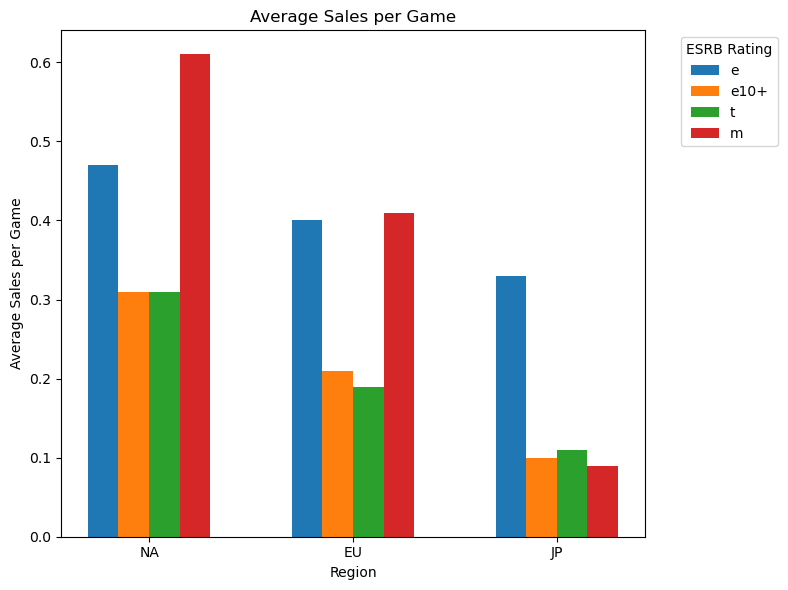

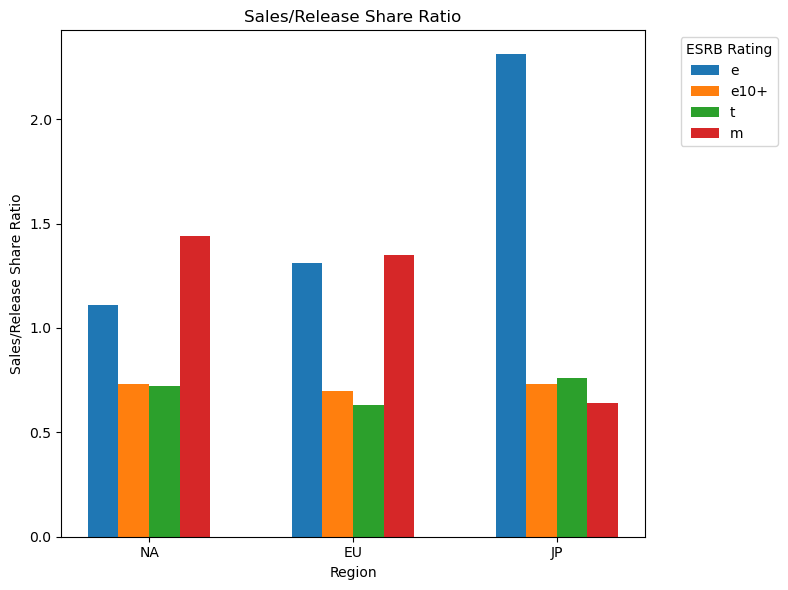

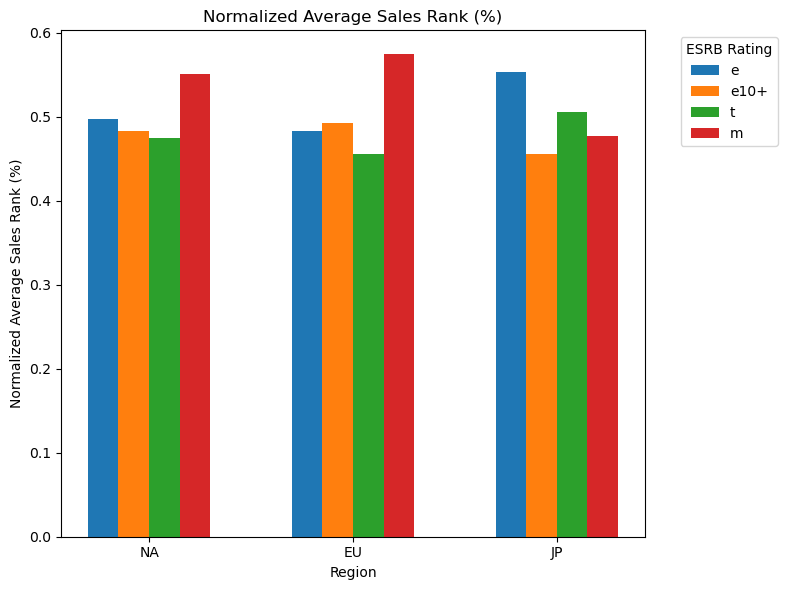

In [53]:
# Bar charts focusing on 3 measures in order to visualize a rating's performance
# in each region

# Define metrics and corresponding row labels in esrb_region_stats
metric_map = {
    'Average Sales per Game': ['avg_na_sales', 'avg_eu_sales', 'avg_jp_sales'],
    'Sales/Release Share Ratio': ['na_sales_release_ratio', 'eu_sales_release_ratio', 'jp_sales_release_ratio'],
    'Normalized Average Sales Rank (%)': ['norm_rank_na_sales', 'norm_rank_eu_sales', 'norm_rank_jp_sales']
}

regions = ['NA', 'EU', 'JP']
ratings = esrb_region_stats.columns.tolist()
n_ratings = len(ratings)
width = 0.15
offsets = (np.arange(n_ratings) - (n_ratings - 1) / 2) * width

# Create one figure per metric
for title, keys in metric_map.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    x = np.arange(len(regions))
    
    # Plot each rating's bars grouped by region
    for j, rating in enumerate(ratings):
        heights = [esrb_region_stats.loc[keys[i], rating] for i in range(len(regions))]
        ax.bar(x + offsets[j], heights, width, label=rating)
    
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(regions)
    ax.set_xlabel('Region')
    ax.set_ylabel(title)
    ax.legend(title='ESRB Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In order to analyze how each ESRB rating performs in terms of sales in each region, I focused on 3 measures:  

1. Average Sales per Game
2. Sales/Release Share Ratio: This measure divides a rating's sales share in a region by the rating's release share in that same region. The idea is to measure to what extent a rating outperforms its release share. In other words, whether it "punches above its weight".
3. Normalized Average Sales Rank: I ranked every game released in a region in terms of sales and then calculated the average rank of all games with a specific rating. I then normalized each average rank by its closeness to rank 1 by considering the number of possible ranks in each region.

- In terms of average sales, games rated M for Mature and E for Everyone are clearly ahead in NA and EU. In JP, games rated 'E' is in clear 1st.
- The same can be said when it comes to the sales/release share ratio.
- For the normalized sales rank, Mature games once again take the top spot in NA and EU. In JP, games rated 'E' once again rank 1st. 

## Hypothesis Tests

In [54]:
# Test the alternative hypothesis that the average user rating of Xbox One and PC games is different
# Null hypothesis: The average user rating is the same

# Isolate the user scores for each platform
xone_scores = main_filt[
    (main_filt["platform"] == "xone") & (main_filt["user_score"].notna())
]["user_score"]
pc_scores = main_filt[
    (main_filt["platform"] == "pc") & (main_filt["user_score"].notna())
]["user_score"]

# A two-sample independent t-test is appropriate, as the user ratings for
# each platforms' games are independent of each other.
alpha = 0.05
t_stat, p_val = ttest_ind(xone_scores, pc_scores, equal_var=False)

print(f"Xbox One Average = {xone_scores.mean().round(2)} | Count = {len(xone_scores)}")
print(f"      PC Average = {  pc_scores.mean().round(2)} | Count = {  len(pc_scores)}")
print()
print(f"  Alpha = {alpha}")
print(f"P-value = {p_val:.4f}")

Xbox One Average = 6.52 | Count = 182
      PC Average = 6.88 | Count = 644

  Alpha = 0.05
P-value = 0.0023


The p-value is below the alpha, meaning there's sufficient evidence to reject the null hypothesis that the average user rating of Xbox One and PC games is the same.

In [55]:
# Test the alternative hypothesis that the average user rating of Action and Sports games is different
# Null hypothesis: The average user rating is the same

# Isolate the user scores for each genre
action_scores = main_filt[
    (main_filt["genre"] == "action") & (main_filt["user_score"].notna())
]["user_score"]
sports_scores = main_filt[
    (main_filt["genre"] == "sports") & (main_filt["user_score"].notna())
]["user_score"]

# A two-sample independent t-test is appropriate, as the user ratings for
# each genres' games are independent of each other.
alpha = 0.05
t_stat, p_val = ttest_ind(action_scores, sports_scores, equal_var=False)

print(
    f"Action Average = {action_scores.mean().round(2)} | Count = {len(action_scores)}"
)
print(
    f"Sports Average = {sports_scores.mean().round(2)} | Count = {len(sports_scores)}"
)
print()
print(f"  Alpha = {alpha}")
print(f"P-value = {p_val:.4f}")

Action Average = 6.86 | Count = 1100
Sports Average = 6.22 | Count = 538

  Alpha = 0.05
P-value = 0.0000


The p-value is below the alpha, meaning there's sufficient evidence to reject the null hypothesis that the average user rating of Action and Sports games is the same.

# 2017 Prediction and Conclusion

Below I use the method developed from the analysis of a platform's typical lifecycle to predict 2017 sales. For most platforms, the method will be applied in the following manner:  

1. Identify the peak year of sales.
2. Multiply that value by 'med_drop_from_peak', which was already calculated in the analysis. This measured the yearly drop in sales from a platform's peak year in relation to the sales from that peak year. This value will be stored in 'drop_amt'.
4. Subtract 'drop_amt' from the platform's sales in 2015 and assign the result to 'pred_2016'. Because 2016 is an incomplete year, I decided to use the method to first predict a full year of sales for that year so that I can then predict 2017. If the 2016 prediction in sales is less than the actual result from the incomplete 2016 data, I opt to use the actual result instead.
5. Subtract 'drop_amt' from 'pred_2016' and assign the value to 'pred_2017'.
6. If at any point a prediction is negative, it's converted to 0.

The analysis concluded the typical platform peaks 2 years after its release year. For most of the platforms, the peak year is already apparent. However, for the PS4 and Xbox One, it's assumed the peak year takes place in 2015 (2 years after their release). This is a major assumption that needed to be made because of the incomplete data in 2016 and the limitations of the method.  

For the PC platform, I decided to use the median sales value from 2005-2015 as the prediction for both 2016 and 2017. I did this because the PC platform (as recorded in the data) is a sort of "evergreen" platform that isn't affected by a succeeding platform model taking over. Thus, it doesn't possess a typical peak year or lifecycle flow.  

Finally, I included a prediction for the Nintendo Switch platform, which isn't in the data, but was released in 2017. I use 'med_first_year_sales' from the analysis for the 2017 prediction, as it measured the typical sales for a platform in its release year.

In [56]:
# Platforms in the prediction
platforms = ["3ds", "pc", "ps3", "ps4", "psv", "wii", "wiiu", "x360", "xone", "switch"]

# Prepare DataFrame that'll store the predictions
preds = pd.DataFrame(
    index=platforms,
    columns=["actual_2015", "actual_2016", "pred_2016", "pred_2017"],
    dtype=float,
)

for p in platforms:
    # Store the actual 2015/2016 sales data for reference
    actual_2015 = (
        year_platform_table_filt.at[2015, p]
        if p in year_platform_table_filt.columns
        else pd.NA
    )
    actual_2016 = (
        year_platform_table_filt.at[2016, p]
        if p in year_platform_table_filt.columns
        else pd.NA
    )

    # Initialize predictions
    pred_2016 = pred_2017 = 0.0

    if p == "pc":
        # For the PC, use this median for the predictions instead
        med_sales = year_platform_table_filt.loc[2005:2015, "pc"].median()
        pred_2016 = med_sales
        pred_2017 = med_sales

    elif p == "switch":
        # New platform without 2015/2016 data
        pred_2016 = pd.NA
        pred_2017 = med_first_year_sales

    else:
        # For all other platforms, apply the described method
        peak_sales = year_platform_table_filt[p].max()
        drop_amt = peak_sales * med_drop_from_peak
        pred_2016 = max(actual_2015 - drop_amt, actual_2016)
        pred_2017 = max(pred_2016 - drop_amt, 0.0)

    # Store actuals and predictions
    preds.loc[p] = [actual_2015, actual_2016, pred_2016, pred_2017]

# Compute sums for comparison
totals = preds[["actual_2015", "pred_2016", "pred_2017"]].sum()

preds.drop(columns="actual_2016", inplace=True)

# Display results
display(preds.round(2))
print(f"\nSum of actual 2015 sales:    {totals['actual_2015']:.2f} million")
print(f"Sum of predicted 2016 sales: {totals['pred_2016']:.2f} million")
print(f"Sum of predicted 2017 sales: {totals['pred_2017']:.2f} million")

,actual_2015,pred_2016,pred_2017
3ds,27.78,15.21,2.63
pc,8.52,12.42,12.42
ps3,16.82,3.60,0.00
ps4,118.90,95.24,71.59
psv,6.25,4.25,1.03
wii,1.14,0.18,0.00
wiiu,16.35,11.97,7.58
x360,11.96,1.52,0.00
xone,60.14,48.17,36.21
switch,NaN,NaN,10.96



Sum of actual 2015 sales:    267.86 million
Sum of predicted 2016 sales: 192.56 million
Sum of predicted 2017 sales: 142.42 million


The method is admittedly crude and is not meant to be used for precise predictions, however it still shows several key points that in reality can be observed without the need of such precision:

1. The only platforms with the potential to produce substantial sales in 2017 is the PC, PS4, Xbox One and Nintendo Switch.
2. The rest of the platforms are in a serious decline towards a market exit. It should be noted that even though the 3DS and Wii U are predicted to have some sales in 2017, they will both experience the effect of a successor platform model entering the market (Nintendo Switch).
3. Total yearly sales across all platforms have been in a gradual decline since the peak achieved in 2008 (671.5), and 2017 is unlikely to change that trend.